# Importing Libraries

In [1]:

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.neural_network import MLPClassifier

%matplotlib inline 
import matplotlib.pylab as plt
%matplotlib inline

from pathlib import Path

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#from mord import LogisticIT #If you're looking for ordinal multi-class (more than 2 levels)
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.6f}'.format

In [2]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.
from pandas.plotting import scatter_matrix, parallel_coordinates

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline 
import matplotlib.pylab as plt #%matplotlib inline renders the figure in a notebook

In [3]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

import dmba
from mord import LogisticAT
from mord import LogisticIT
from sklearn.svm import LinearSVC

%matplotlib inline
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:.4f}'.format

ModuleNotFoundError: No module named 'mord'

# Cleaning Up the Data

In [3]:
pd.set_option('display.max_columns', None)
wdi_df = pd.read_excel('WDI_DATA.xlsx')
wdi_df.head()

,Time,Time Code,Country Name,Income Group,Region,Country Code,Freedom of Press Index,Age dependency ratio (% of working-age population) [SP.POP.DPND],Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]",Exports of goods and services (current US$) [NE.EXP.GNFS.CD],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN],Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN],GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (current US$) [NY.GDP.PCAP.CD],GNI (current US$) [NY.GNP.MKTP.CD],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]",Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS],Households and NPISHs Final consumption expenditure (current US$) [NE.CON.PRVT.CD],Households and NPISHs final consumption expenditure (% of GDP) [NE.CON.PRVT.ZS],Households and NPISHs Final consumption expenditure per capita (constant 2015 US$) [NE.CON.PRVT.PC.KD],"Immunization, DPT (% of children ages 12-23 months) [SH.IMM.IDPT]","Immunization, HepB3 (% of one-year-old children) [SH.IMM.HEPB]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],"Incidence of HIV, all (per 1,000 uninfected population) [SH.HIV.INCD.TL.P3]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]","Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],Ratio of female to male labor force participation rate (%) (modeled ILO estimate) [SL.TLF.CACT.FM.ZS],Refugee population by country or territory of asylum [SM.POP.REFG],Refugee population by country or territory of origin [SM.POP.REFG.OR],Rural population (% of total population) [SP.RUR.TOTL.ZS],Trade (% of GDP) [NE.TRD.GNFS.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Women Business and the Law Index Score (scale 1-100) [SG.LAW.INDX]
0,2021,YR2021,Afghanistan,Low income,South Asia,AFG,38.000000,78.214069,NaN,NaN,NaN,35.893002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.880110,NaN,NaN,NaN,NaN,66.000000,66.000000,63.000000,NaN,0.040000,NaN,41.390999,NaN,39835428.000000,27.016129,22.322784,66949.000000,2712858.000000,73.686000,NaN,13.283000,26.314000,38.125000
1,2021,YR2021,Albania,Upper middle income,Europe & Central Asia,ALB,56.000000,47.744242,NaN,NaN,123.448662,51.609001,5590528223.531685,30.616182,NaN,NaN,18260043499.806801,6494.385713,18010445095.633694,6110.000000,NaN,110.412734,13611338080.564142,74.541652,3621.822762,98.000000,98.000000,87.000000,43.902110,0.030000,2.041472,58.527000,103.520000,2811666.000000,35.714286,76.689244,109.000000,19847.000000,37.031000,74.518292,11.819000,62.969000,91.250000
2,2021,YR2021,Algeria,Lower middle income,Middle East & North Africa,DZA,45.000000,60.858223,NaN,NaN,166.218895,35.113998,42040567028.025146,25.026658,NaN,NaN,167983141738.311493,3765.034625,163926142939.960480,3660.000000,16.213169,100.200071,71542092074.595520,42.588852,NaN,91.000000,91.000000,80.000000,25.226729,0.040000,7.226063,40.223000,135.064058,44616626.000000,8.108108,24.323820,97890.000000,6003.000000,25.739000,50.253387,12.704000,74.261000,57.500000
3,2021,YR2021,American Samoa,Upper middle income,East Asia & Pacific,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55103.000000,NaN,NaN,NaN,NaN,12.831000,NaN,NaN,

In [4]:
wdi_df = wdi_df.drop(columns = ['Country Code', 'Time', 'Time Code'])

In [5]:
#Only including the list of countries from the WDI dataset
countries_df = wdi_df.loc[0:216]
countries_df.tail()

,Country Name,Income Group,Region,Freedom of Press Index,Age dependency ratio (% of working-age population) [SP.POP.DPND],Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]",Exports of goods and services (current US$) [NE.EXP.GNFS.CD],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN],Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN],GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (current US$) [NY.GDP.PCAP.CD],GNI (current US$) [NY.GNP.MKTP.CD],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]",Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS],Households and NPISHs Final consumption expenditure (current US$) [NE.CON.PRVT.CD],Households and NPISHs final consumption expenditure (% of GDP) [NE.CON.PRVT.ZS],Households and NPISHs Final consumption expenditure per capita (constant 2015 US$) [NE.CON.PRVT.PC.KD],"Immunization, DPT (% of children ages 12-23 months) [SH.IMM.IDPT]","Immunization, HepB3 (% of one-year-old children) [SH.IMM.HEPB]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],"Incidence of HIV, all (per 1,000 uninfected population) [SH.HIV.INCD.TL.P3]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]","Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],Ratio of female to male labor force participation rate (%) (modeled ILO estimate) [SL.TLF.CACT.FM.ZS],Refugee population by country or territory of asylum [SM.POP.REFG],Refugee population by country or territory of origin [SM.POP.REFG.OR],Rural population (% of total population) [SP.RUR.TOTL.ZS],Trade (% of GDP) [NE.TRD.GNFS.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Women Business and the Law Index Score (scale 1-100) [SG.LAW.INDX]
212,Virgin Islands (U.S.),High income,Latin America & Caribbean,NaN,66.822666,NaN,NaN,NaN,42.831001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.381001,NaN,105870.000000,NaN,68.623216,NaN,NaN,3.960000,NaN,13.265000,96.040000,NaN
213,West Bank and Gaza,Lower middle income,Middle East & North Africa,28.000000,70.109189,NaN,NaN,113.070878,31.316000,3180200000.000000,17.631731,NaN,NaN,18036800000.000000,3663.969055,21434600000.000000,4220.000000,NaN,137.750044,15843200000.000000,87.838197,2652.136032,95.000000,95.000000,98.000000,56.799987,NaN,1.237481,41.700001,NaN,4922749.000000,NaN,25.144071,2400208.000000,103581.000000,22.997000,74.431717,24.903000,77.003000,26.250000
214,"Yemen, Rep.",Low income,Middle East & North Africa,29.000000,70.613157,NaN,NaN,NaN,31.808001,NaN,NaN,NaN,NaN,21061691629.536888,690.759273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.000000,72.000000,71.000000,NaN,0.040000,NaN,36.804001,1035.467186,30490639.000000,0.000000,8.863492,89467.000000,37611.000000,61.454000,NaN,13.574000,38.546000,26.875000
215,Zambia,Low income,Sub-Saharan Africa,55.000000,84.263822,NaN,NaN,299.818881,63.868999,11576250153.607912,54.597075,NaN,NaN,21203059080.350677,1120.630171,19281348474.858757,1040.000000,11.514140,NaN,NaN,NaN,NaN,91.000000,91.000000,90.000000,36.010701,2.170000,22.021234,73.433998,20.018487,18920657.000000,15.060241,88.930856,75154.000000,255.000000,54.808000,90.607776,13.026000,45.192000,81.250000
216,Zimbabwe,Lower middle income,Sub-Sahar

In [6]:
#Further cleaning up the data to only include those which have a Press Index Value
countries_df = countries_df.dropna(subset=['Freedom of Press Index'])
countries_df = countries_df.reset_index(drop=True)
countries_df.tail()

,Country Name,Income Group,Region,Freedom of Press Index,Age dependency ratio (% of working-age population) [SP.POP.DPND],Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]",Exports of goods and services (current US$) [NE.EXP.GNFS.CD],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN],Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN],GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (current US$) [NY.GDP.PCAP.CD],GNI (current US$) [NY.GNP.MKTP.CD],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]",Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS],Households and NPISHs Final consumption expenditure (current US$) [NE.CON.PRVT.CD],Households and NPISHs final consumption expenditure (% of GDP) [NE.CON.PRVT.ZS],Households and NPISHs Final consumption expenditure per capita (constant 2015 US$) [NE.CON.PRVT.PC.KD],"Immunization, DPT (% of children ages 12-23 months) [SH.IMM.IDPT]","Immunization, HepB3 (% of one-year-old children) [SH.IMM.HEPB]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],"Incidence of HIV, all (per 1,000 uninfected population) [SH.HIV.INCD.TL.P3]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]","Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],Ratio of female to male labor force participation rate (%) (modeled ILO estimate) [SL.TLF.CACT.FM.ZS],Refugee population by country or territory of asylum [SM.POP.REFG],Refugee population by country or territory of origin [SM.POP.REFG.OR],Rural population (% of total population) [SP.RUR.TOTL.ZS],Trade (% of GDP) [NE.TRD.GNFS.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Women Business and the Law Index Score (scale 1-100) [SG.LAW.INDX]
167,Vietnam,Lower middle income,East Asia & Pacific,26.000000,45.725949,NaN,NaN,171.880423,72.834999,NaN,NaN,NaN,NaN,362637524070.968628,3694.019046,346675524076.076599,3560.000000,14.817490,NaN,NaN,NaN,NaN,83.000000,83.000000,89.000000,NaN,0.060000,1.834716,74.446999,23159.782593,98168829.000000,30.260521,87.663185,NaN,317737.000000,61.948000,NaN,2.166000,38.052000,85.000000
168,West Bank and Gaza,Lower middle income,Middle East & North Africa,28.000000,70.109189,NaN,NaN,113.070878,31.316000,3180200000.000000,17.631731,NaN,NaN,18036800000.000000,3663.969055,21434600000.000000,4220.000000,NaN,137.750044,15843200000.000000,87.838197,2652.136032,95.000000,95.000000,98.000000,56.799987,NaN,1.237481,41.700001,NaN,4922749.000000,NaN,25.144071,2400208.000000,103581.000000,22.997000,74.431717,24.903000,77.003000,26.250000
169,"Yemen, Rep.",Low income,Middle East & North Africa,29.000000,70.613157,NaN,NaN,NaN,31.808001,NaN,NaN,NaN,NaN,21061691629.536888,690.759273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.000000,72.000000,71.000000,NaN,0.040000,NaN,36.804001,1035.467186,30490639.000000,0.000000,8.863492,89467.000000,37611.000000,61.454000,NaN,13.574000,38.546000,26.875000
170,Zambia,Low income,Sub-Saharan Africa,55.000000,84.263822,NaN,NaN,299.818881,63.868999,11576250153.607912,54.597075,NaN,NaN,21203059080.350677,1120.630171,19281348474.858757,1040.000000,11.514140,NaN,NaN,NaN,NaN,91.000000,91.000000,90.000000,36.010701,2.170000,22.021234,73.433998,20.018487,18920657.000000,15.060241,88.930856,

In [7]:
pd.DataFrame(countries_df).isna().sum()

Country Name                                                                                                        0
Income Group                                                                                                        1
Region                                                                                                              0
Freedom of Press Index                                                                                              0
Age dependency ratio (% of working-age population) [SP.POP.DPND]                                                    3
Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN]                                  89
Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN]                                  89
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                                    41
Employment to population ratio, 15+, total (%) (modeled 

In [8]:
#We now have 172 countries - want to remove any columns where over 15% of values are null
countries_df = countries_df.dropna(axis = 'columns', thresh = 147)
countries_df.head()

,Country Name,Income Group,Region,Freedom of Press Index,Age dependency ratio (% of working-age population) [SP.POP.DPND],"Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]",GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (current US$) [NY.GDP.PCAP.CD],GNI (current US$) [NY.GNP.MKTP.CD],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Immunization, DPT (% of children ages 12-23 months) [SH.IMM.IDPT]","Immunization, HepB3 (% of one-year-old children) [SH.IMM.HEPB]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],Ratio of female to male labor force participation rate (%) (modeled ILO estimate) [SL.TLF.CACT.FM.ZS],Refugee population by country or territory of asylum [SM.POP.REFG],Refugee population by country or territory of origin [SM.POP.REFG.OR],Rural population (% of total population) [SP.RUR.TOTL.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Women Business and the Law Index Score (scale 1-100) [SG.LAW.INDX]
0,Afghanistan,Low income,South Asia,38.000000,78.214069,35.893002,NaN,NaN,NaN,NaN,66.000000,66.000000,63.000000,41.390999,39835428.000000,27.016129,22.322784,66949.000000,2712858.000000,73.686000,13.283000,26.314000,38.125000
1,Albania,Upper middle income,Europe & Central Asia,56.000000,47.744242,51.609001,18260043499.806801,6494.385713,18010445095.633694,6110.000000,98.000000,98.000000,87.000000,58.527000,2811666.000000,35.714286,76.689244,109.000000,19847.000000,37.031000,11.819000,62.969000,91.250000
2,Algeria,Lower middle income,Middle East & North Africa,45.000000,60.858223,35.113998,167983141738.311493,3765.034625,163926142939.960480,3660.000000,91.000000,91.000000,80.000000,40.223000,44616626.000000,8.108108,24.323820,97890.000000,6003.000000,25.739000,12.704000,74.261000,57.500000
3,Andorra,High income,Europe & Central Asia,68.000000,NaN,NaN,3329910723.760784,43047.686270,NaN,NaN,99.000000,98.000000,99.000000,NaN,77354.000000,46.428571,NaN,NaN,NaN,12.142000,NaN,87.858000,NaN
4,Angola,Lower middle income,Sub-Saharan Africa,57.000000,93.637469,69.936996,72546985708.570663,2137.909393,66833691182.161034,1770.000000,45.000000,41.000000,36.000000,76.459000,33933611.000000,29.545455,93.546310,26045.000000,11403.000000,32.540000,8.530000,67.460000,79.375000


In [9]:
countries_df = countries_df.rename(columns={'Freedom of Press Index' : 'FPI','Age dependency ratio (% of working-age population) [SP.POP.DPND]': 'Age dependency ratio',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]' : 'Employment/Pop ratio',
       'GDP (current US$) [NY.GDP.MKTP.CD]': 'GDP (USD)',
       'GDP per capita (current US$) [NY.GDP.PCAP.CD]': 'GDP per Capita (USD)',
       'GNI (current US$) [NY.GNP.MKTP.CD]' : 'GNI (USD)',
       'GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]' : 'GNI per Capita (USD)',
       'Immunization, DPT (% of children ages 12-23 months) [SH.IMM.IDPT]' : 'IMM_DPT',
       'Immunization, HepB3 (% of one-year-old children) [SH.IMM.HEPB]' : 'IMM_HEP',
       'Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]' : 'IMM_Measles',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]' : 'Labor Force Participation',
       'Population, total [SP.POP.TOTL]': 'Total_POP',
       'Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS]' : 'Women in Parliaments',
       'Ratio of female to male labor force participation rate (%) (modeled ILO estimate) [SL.TLF.CACT.FM.ZS]' : 'Female to male ratio',
       'Refugee population by country or territory of asylum [SM.POP.REFG]' : 'Refugee_Asylum',
       'Refugee population by country or territory of origin [SM.POP.REFG.OR]' : 'Refugee_Origin',
       'Rural population (% of total population) [SP.RUR.TOTL.ZS]' : 'Rural_POP',
       'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]': 'Unemployment',
       'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]' : 'Urban_POP',
       'Women Business and the Law Index Score (scale 1-100) [SG.LAW.INDX]' :'Women in Business/Law'})

In [10]:
countries_df.columns

Index(['Country Name', 'Income Group', 'Region', 'FPI', 'Age dependency ratio',
       'Employment/Pop ratio', 'GDP (USD)', 'GDP per Capita (USD)',
       'GNI (USD)', 'GNI per Capita (USD)', 'IMM_DPT', 'IMM_HEP',
       'IMM_Measles', 'Labor Force Participation', 'Total_POP',
       'Women in Parliaments', 'Female to male ratio', 'Refugee_Asylum',
       'Refugee_Origin', 'Rural_POP', 'Unemployment', 'Urban_POP',
       'Women in Business/Law'],
      dtype='object')

In [11]:
#Making all numeric values into the float data type and categorical variables as a category
a = countries_df[['Country Name', 'Income Group', 'Region']]
b = countries_df[['FPI', 'Age dependency ratio',
       'Employment/Pop ratio', 'GDP (USD)', 'GDP per Capita (USD)',
       'GNI (USD)', 'GNI per Capita (USD)', 'IMM_DPT', 'IMM_HEP',
       'IMM_Measles', 'Labor Force Participation', 'Total_POP',
       'Women in Parliaments', 'Female to male ratio', 'Refugee_Asylum',
       'Refugee_Origin', 'Rural_POP', 'Unemployment', 'Urban_POP',
       'Women in Business/Law']]


In [12]:
a = a.astype('category')
b = b.astype('float')
countries_df = pd.concat([a,b], axis="columns")

In [13]:
medians = countries_df.groupby('Region').median()
print(medians)

                                 FPI  Age dependency ratio  \
Region                                                       
East Asia & Pacific        50.500000             50.520517   
Europe & Central Asia      68.000000             54.554892   
Latin America & Caribbean  61.500000             53.247078   
Middle East & North Africa 40.000000             51.340466   
North America              76.500000             53.368559   
South Asia                 41.500000             49.867532   
Sub-Saharan Africa         57.500000             79.784235   

                            Employment/Pop ratio             GDP (USD)  \
Region                                                                   
East Asia & Pacific                    61.204000   365388385871.227661   
Europe & Central Asia                  55.231001   148575611995.688660   
Latin America & Caribbean              55.266001    61462306718.043777   
Middle East & North Africa             38.220001    46041852456.661598 

In [14]:
# "Cleaning" the data -- part 2: replacing/imputing missing data

# Approach:
# If a categorical feature is missing: add new category 'missing_value' 
# For Numerical features: replacing with 0 (or median, mean, or most frequent value, etc.) An alternative approach is to imputate, see here: https://scikit-learn.org/stable/modules/impute.html 

# fixing categoricals
imputer = SimpleImputer(missing_values = np.nan, strategy='constant',fill_value="Missing")
imputer.fit(countries_df.select_dtypes(exclude=['int64','float64']))
countries_df[countries_df.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(countries_df.select_dtypes(exclude=['int64','float64']))
           
# fixing numericals 
for col in ['FPI', 'Age dependency ratio',
       'Employment/Pop ratio', 'GDP (USD)', 'GDP per Capita (USD)',
       'GNI (USD)', 'GNI per Capita (USD)', 'IMM_DPT', 'IMM_HEP',
       'IMM_Measles', 'Labor Force Participation', 'Total_POP',
       'Women in Parliaments', 'Female to male ratio', 'Refugee_Asylum',
       'Refugee_Origin', 'Rural_POP', 'Unemployment', 'Urban_POP',
       'Women in Business/Law']:
    countries_df[col] = countries_df[col].fillna(countries_df.groupby('Region')[col].transform('median'))

In [15]:
countries_df['FPI_Level'] = [ 'very serious' if index <=40
                             else 'difficult'if index <=55
                             else 'problematic' if index <= 70
                             else 'satisfactory' if index <= 80
                             else 'good'
                             for index in countries_df['FPI']]

In [16]:
countries_df.head()

,Country Name,Income Group,Region,FPI,Age dependency ratio,Employment/Pop ratio,GDP (USD),GDP per Capita (USD),GNI (USD),GNI per Capita (USD),IMM_DPT,IMM_HEP,IMM_Measles,Labor Force Participation,Total_POP,Women in Parliaments,Female to male ratio,Refugee_Asylum,Refugee_Origin,Rural_POP,Unemployment,Urban_POP,Women in Business/Law,FPI_Level
0,Afghanistan,Low income,South Asia,38.000000,78.214069,35.893002,215431000439.343811,2390.239113,212102277408.457825,2395.000000,66.000000,66.000000,63.000000,41.390999,39835428.000000,27.016129,22.322784,66949.000000,2712858.000000,73.686000,13.283000,26.314000,38.125000,very serious
1,Albania,Upper middle income,Europe & Central Asia,56.000000,47.744242,51.609001,18260043499.806801,6494.385713,18010445095.633694,6110.000000,98.000000,98.000000,87.000000,58.527000,2811666.000000,35.714286,76.689244,109.000000,19847.000000,37.031000,11.819000,62.969000,91.250000,problematic
2,Algeria,Lower middle income,Middle East & North Africa,45.000000,60.858223,35.113998,167983141738.311493,3765.034625,163926142939.960480,3660.000000,91.000000,91.000000,80.000000,40.223000,44616626.000000,8.108108,24.323820,97890.000000,6003.000000,25.739000,12.704000,74.261000,57.500000,difficult
3,Andorra,High income,Europe & Central Asia,68.000000,54.554892,55.231001,3329910723.760784,43047.686270,171667523525.097565,19755.000000,99.000000,98.000000,99.000000,58.726500,77354.000000,46.428571,80.949416,5676.000000,563.000000,12.142000,6.608000,87.858000,93.750000,problematic
4,Angola,Lower middle income,Sub-Saharan Africa,57.000000,93.637469,69.936996,72546985708.570663,2137.909393,66833691182.161034,1770.000000,45.000000,41.000000,36.000000,76.459000,33933611.000000,29.545455,93.546310,26045.000000,11403.000000,32.540000,8.530000,67.460000,79.375000,problematic


# Exploring the Data

In [17]:
countries_df.describe()

,FPI,Age dependency ratio,Employment/Pop ratio,GDP (USD),GDP per Capita (USD),GNI (USD),GNI per Capita (USD),IMM_DPT,IMM_HEP,IMM_Measles,Labor Force Participation,Total_POP,Women in Parliaments,Female to male ratio,Refugee_Asylum,Refugee_Origin,Rural_POP,Unemployment,Urban_POP,Women in Business/Law
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,57.825581,59.337567,55.260814,553833450390.648071,15328.745768,552932054723.275757,13587.267442,84.366279,83.651163,82.982558,59.901831,45256905.656977,25.637282,71.604081,159971.767442,121951.029070,39.545634,8.255942,60.454366,77.547238
std,17.385342,15.436380,11.993371,2288268294374.615234,22381.052476,2307121343035.839355,19128.677022,15.272175,15.318274,16.530487,10.981257,155793075.684216,12.505646,19.765570,475606.629075,604010.323471,22.305988,5.846696,22.305988,17.158320
min,13.000000,18.383390,22.506001,788389971.603065,236.795414,773503831.641187,240.000000,31.000000,31.000000,18.000000,31.426001,38254.000000,0.000000,8.863492,10.000000,5.000000,0.000000,0.258000,13.456000,26.250000
25%,45.000000,49.665635,47.896249,15738074070.403975,2089.322787,15976640035.551811,2010.000000,77.000000,77.000000,74.500000,54.202500,3446184.500000,16.243056,61.615433,1314.000000,123.500000,21.486500,4.404500,43.368500,69.375000
50%,59.000000,55.581584,55.466499,60390927177.065666,5349.283229,57115376516.510757,4860.000000,90.000000,89.000000,89.000000,60.271000,10540189.500000,24.527497,77.114543,7021.250000,1833.500000,38.714500,6.501000,61.285500,80.625000
75%,71.250000,68.645103,62.415001,315006467084.161499,18073.859111,304732790867.477173,15252.500000,96.000000,95.000000,95.250000,66.323997,33502964.750000,34.424064,86.390985,78221.750000,18109.500000,56.631500,10.478500,78.513500,88.750000
max,92.000000,108.922151,87.071999,22996100000000.000000,135682.794275,23393116832631.101562,90360.000000,99.000000,99.000000,99.000000,87.296997,1412360000.000000,61.250000,102.083252,3759817.000000,6848845.000000,86.544000,33.558998,100.000000,100.000000


In [18]:
#top 10 highest Freedom of Press Index
#high income + Europe
countries_df.sort_values(by='FPI',ascending=False).head(5)

,Country Name,Income Group,Region,FPI,Age dependency ratio,Employment/Pop ratio,GDP (USD),GDP per Capita (USD),GNI (USD),GNI per Capita (USD),IMM_DPT,IMM_HEP,IMM_Measles,Labor Force Participation,Total_POP,Women in Parliaments,Female to male ratio,Refugee_Asylum,Refugee_Origin,Rural_POP,Unemployment,Urban_POP,Women in Business/Law,FPI_Level
117,Norway,High income,Europe & Central Asia,92.000000,53.647070,62.869999,482437019790.454041,89202.750538,504617694994.179260,84090.000000,97.000000,96.000000,97.000000,66.168999,5408320.000000,44.970414,83.799863,46042.000000,5.000000,16.677000,4.985000,83.323000,96.875000,good
42,Denmark,High income,Europe & Central Asia,90.000000,57.779005,59.150002,397104343478.301025,67803.047105,409819096012.736572,68110.000000,97.000000,93.000000,95.000000,62.132000,5856733.000000,39.664804,86.599254,36023.000000,8.000000,11.760000,4.798000,88.240000,100.000000,good
146,Sweden,High income,Europe & Central Asia,88.000000,61.616013,59.206001,627437898887.290405,60238.986564,646115186116.897705,58890.000000,98.000000,98.000000,97.000000,64.820000,10415811.000000,46.991404,90.651235,240854.000000,9.000000,11.762000,8.661000,88.238000,100.000000,good
73,Ireland,High income,Europe & Central Asia,88.000000,54.746464,58.314999,498559576714.720642,99152.102572,372085194240.189697,74520.000000,94.000000,93.000000,90.000000,62.458000,5028230.000000,22.500000,82.431865,9571.000000,5.000000,36.088000,6.633000,63.912000,100.000000,good
52,Finland,High income,Europe & Central Asia,88.000000,62.873952,55.640999,299155237589.142456,53982.614274,304220914337.204407,53660.000000,89.000000,93.000000,93.000000,60.167999,5541696.000000,46.000000,88.178793,24078.000000,5.000000,14.404000,7.525000,85.596000,97.500000,good


In [19]:
#top 10 lowest Freedom of Press Index
#low income + East Asia
countries_df.sort_values(by='FPI',ascending=True).head(5)

,Country Name,Income Group,Region,FPI,Age dependency ratio,Employment/Pop ratio,GDP (USD),GDP per Capita (USD),GNI (USD),GNI per Capita (USD),IMM_DPT,IMM_HEP,IMM_Measles,Labor Force Participation,Total_POP,Women in Parliaments,Female to male ratio,Refugee_Asylum,Refugee_Origin,Rural_POP,Unemployment,Urban_POP,Women in Business/Law,FPI_Level
81,"Korea, Dem. People's Rep.",Low income,East Asia & Pacific,13.000000,41.609841,79.403999,365388385871.227661,6159.680250,349153926311.872009,4860.000000,41.000000,41.000000,42.000000,81.516998,25887045.000000,17.612809,89.603091,6770.500000,528.000000,37.358000,2.592000,62.642000,78.750000,very serious
48,Eritrea,Low income,Sub-Saharan Africa,19.000000,79.784235,70.651001,15400735129.633518,1151.000670,14758456543.794161,1090.000000,95.000000,95.000000,93.000000,76.834000,15092171.000000,22.857143,83.928867,121.000000,511911.000000,55.383000,8.047000,44.617000,69.375000,very serious
71,"Iran, Islamic Rep.",Lower middle income,Middle East & North Africa,23.000000,46.281539,36.588001,46041852456.661598,4165.091674,45527894077.652527,4220.000000,98.000000,98.000000,99.000000,41.324001,85028760.000000,5.594406,21.082161,798343.000000,142989.000000,23.655000,11.461000,76.345000,31.250000,very serious
31,China,Upper middle income,East Asia & Pacific,25.000000,42.874686,64.778999,17734062645371.375000,12556.333120,17576647542254.613281,11890.000000,99.000000,99.000000,99.000000,68.056999,1412360000.000000,24.941176,82.934444,303436.000000,170200.000000,37.488000,4.817000,62.512000,75.625000,very serious
108,Myanmar,Lower middle income,East Asia & Pacific,25.000000,46.158444,53.550999,65067808984.679161,1187.238484,63337728962.514160,1140.000000,37.000000,37.000000,44.000000,54.740002,54806014.000000,15.294118,58.584661,6770.500000,1177029.000000,68.552000,2.173000,31.448000,58.750000,very serious


<AxesSubplot: ylabel='FPI'>

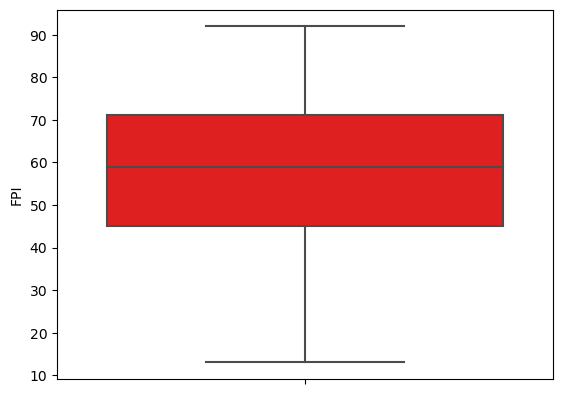

In [23]:
sns.boxplot(y=countries_df["FPI"], color="red")
#half of countries are kind of struggling with FPI

Text(0, 0.5, 'percentage of FPI')

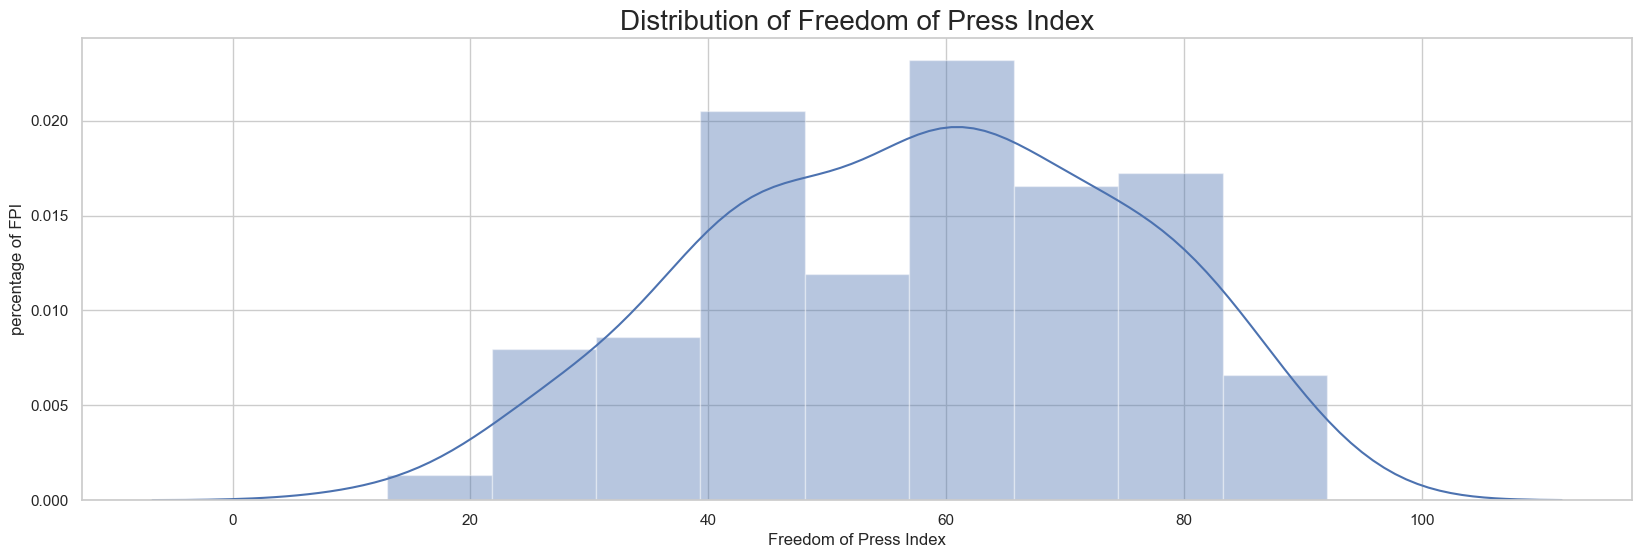

In [24]:
#Distribution of Freedom of Press Index
plt.figure(figsize=(20, 6))
sns.set(style = 'whitegrid')
sns.distplot(countries_df['FPI'])
plt.title('Distribution of Freedom of Press Index', fontsize = 20)
plt.xlabel('Freedom of Press Index')
plt.ylabel('percentage of FPI')

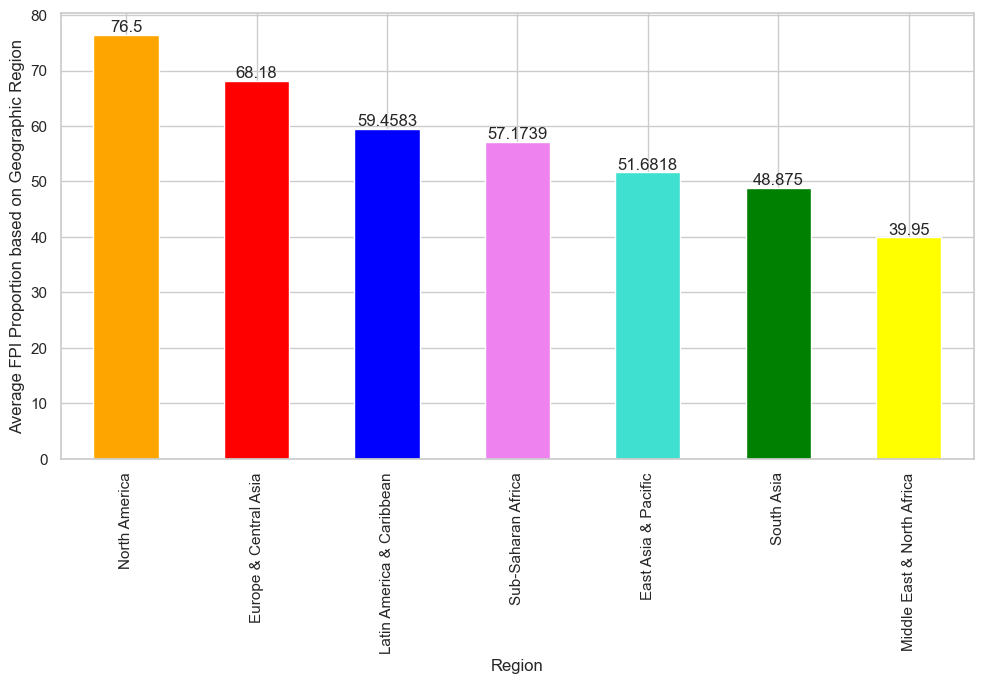

In [25]:
c = ['orange','red','blue',  'violet', 'turquoise', 'green', 'yellow', 'purple', 'brown', 'black', 'grey']

ax = countries_df.groupby('Region').mean()['FPI'].sort_values(ascending=False).plot(kind='bar',color=c,figsize=[10, 7])
ax.set_ylabel('Average FPI Proportion based on Geographic Region')
ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()
plt.show()


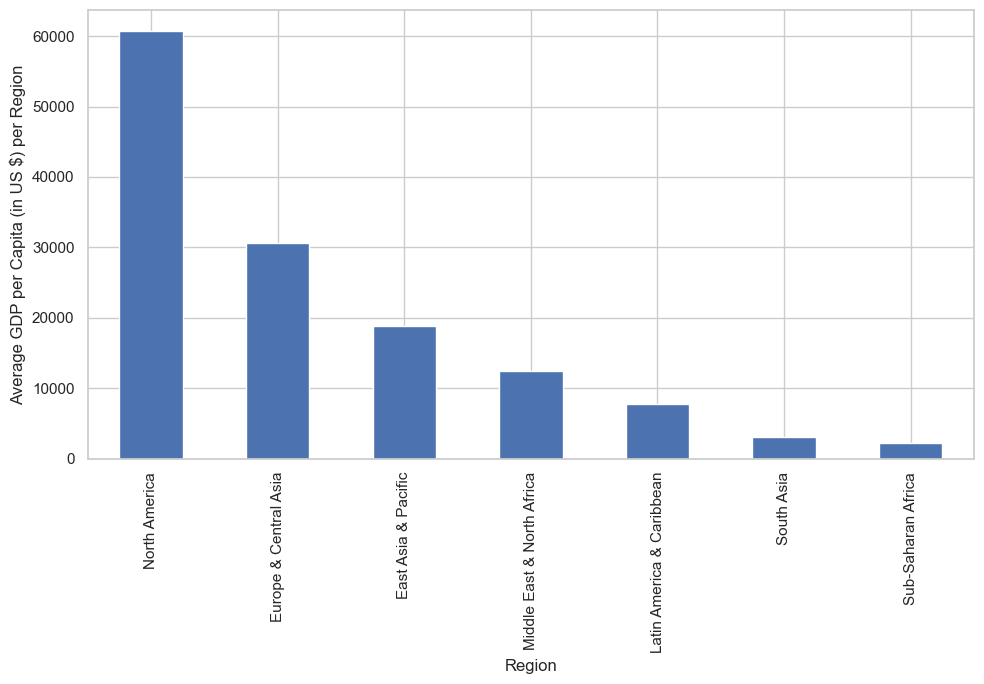

In [26]:
#Bar Plot grouping the averages of the GDP per Capita based on region
ax = countries_df.groupby('Region').mean()['GDP per Capita (USD)'].sort_values(ascending=False).plot(kind='bar', figsize=[10, 7])
ax.set_ylabel('Average GDP per Capita (in US $) per Region')
#ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()

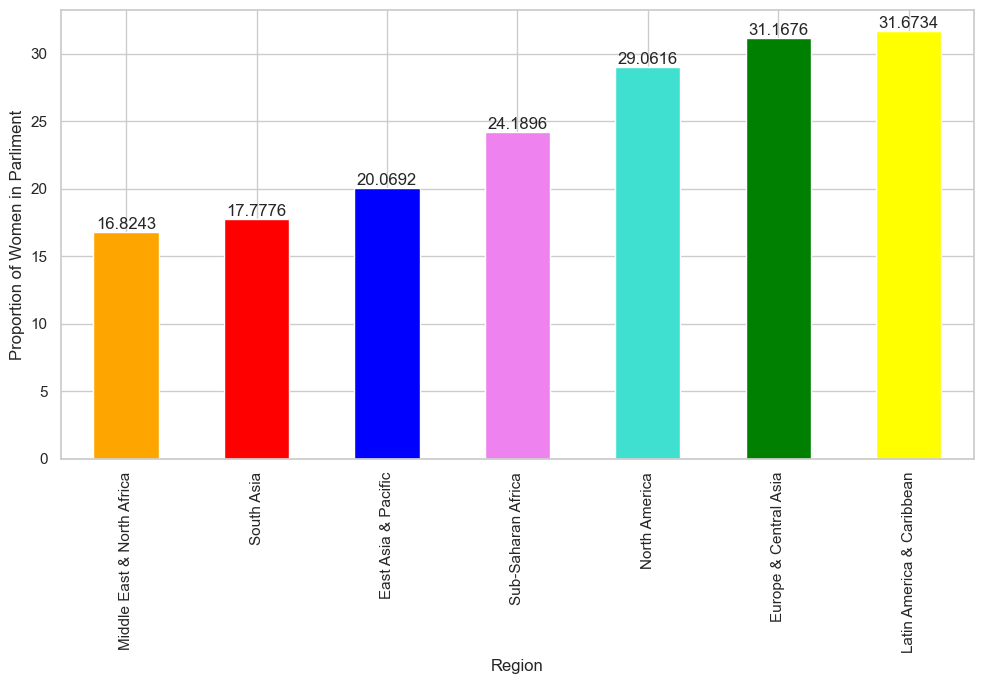

In [27]:
#Bar Plot grouping the percent of women in parliment based on region
ax = countries_df.groupby('Region').mean()['Women in Parliaments'].sort_values(ascending=True).plot(kind='bar', color=c,figsize=[10, 7])
ax.set_ylabel('Proportion of Women in Parliment')
ax.bar_label(ax.containers[0], label_type='edge')
#ax.set_xticklabels(ax.get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

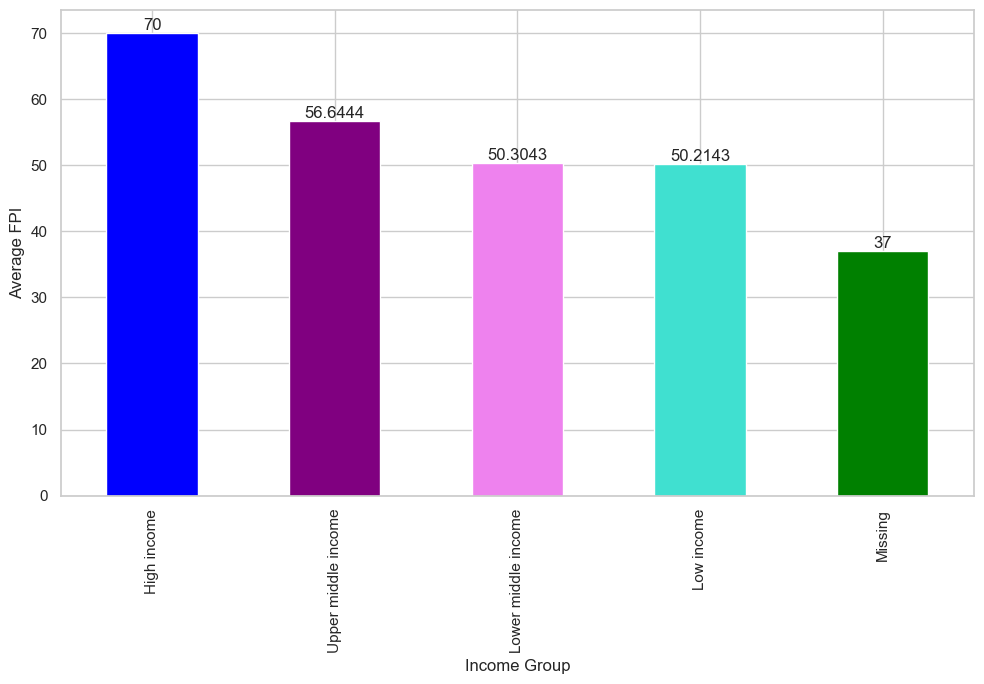

In [28]:
c = ['blue', 'purple', 'violet', 'turquoise', 'green', 'yellow', 'orange', 'red', 'brown', 'black', 'grey']
ax = countries_df.groupby('Income Group').mean()['FPI'].sort_values(ascending=False).plot(kind='bar',color=c, figsize=[10, 7])
ax.set_ylabel('Average FPI')
ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()
plt.show()

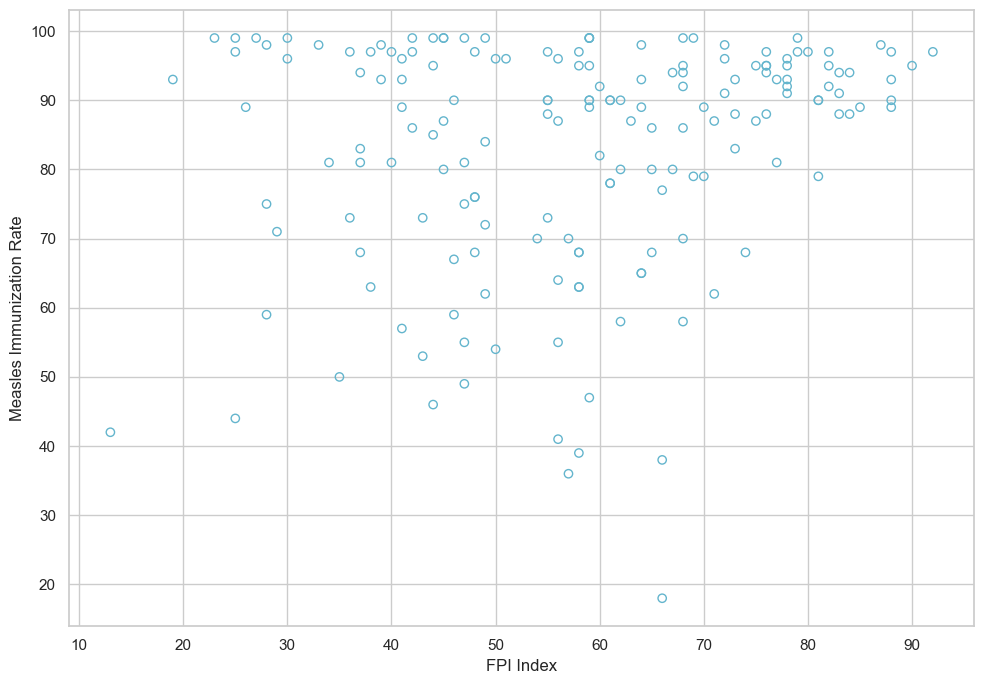

In [29]:
# Scatter plot looking at FPI index to Measles Immunization Rate
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

ax.scatter(countries_df['FPI'], countries_df['IMM_Measles'], color='C9', facecolor='none') #facecolor none leaves the bubble unfilled
plt.xlabel('FPI Index')
plt.ylabel('Measles Immunization Rate')

plt.tight_layout()
plt.show()

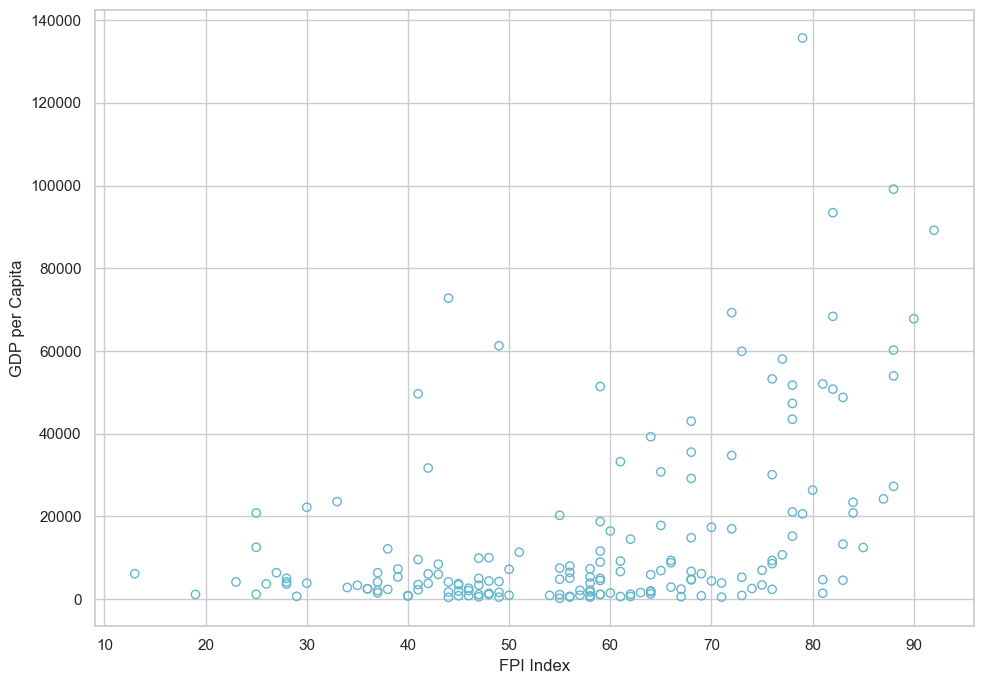

In [30]:
# Scatter plot looking at FPI index to GDP per Capita
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

ax.scatter(countries_df['FPI'], countries_df['GDP per Capita (USD)'], color='C9', facecolor='none') #facecolor none leaves the bubble unfilled
plt.xlabel('FPI Index')
plt.ylabel('GDP per Capita')

plt.tight_layout()
plt.show()

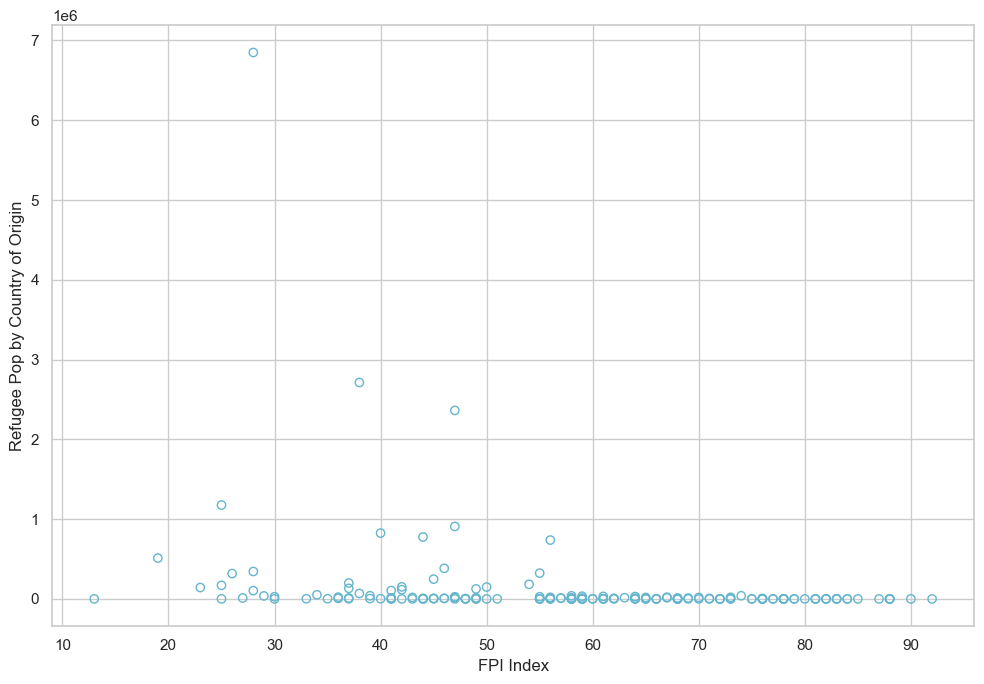

In [31]:
# Scatter plot looking at FPI index to Refugee Origin
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

ax.scatter(countries_df['FPI'], countries_df['Refugee_Origin'], color='C9', facecolor='none') #facecolor none leaves the bubble unfilled
plt.xlabel('FPI Index')
plt.ylabel('Refugee Pop by Country of Origin')

plt.tight_layout()
plt.show()

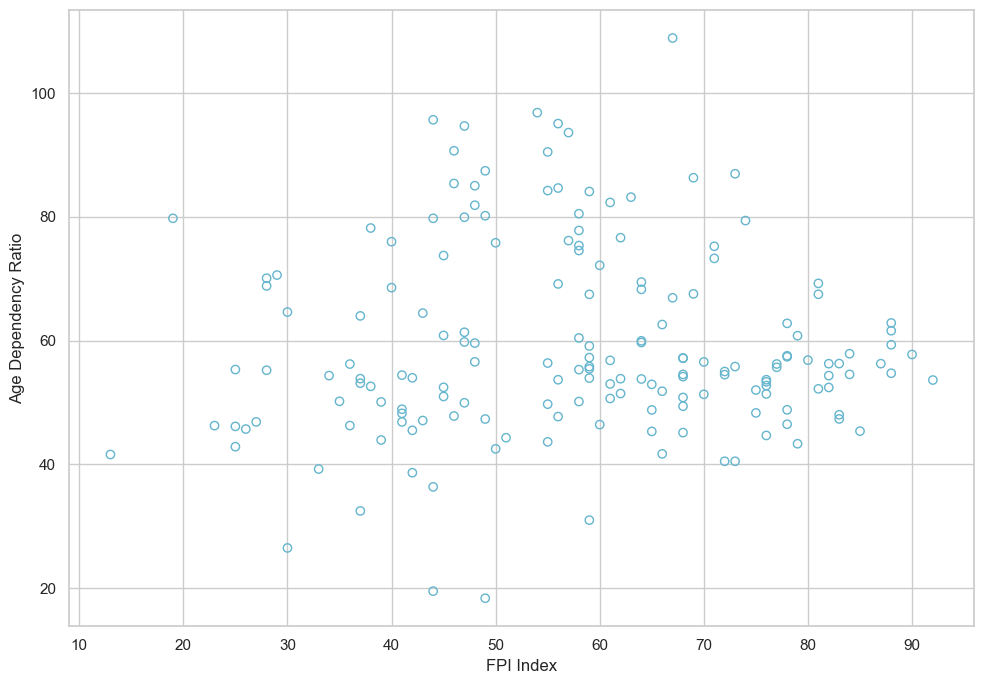

In [32]:
# Scatter plot looking at FPI index to Age Dependency Ratio
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

ax.scatter(countries_df['FPI'], countries_df['Age dependency ratio'], color='C9', facecolor='none') #facecolor none leaves the bubble unfilled
plt.xlabel('FPI Index')
plt.ylabel('Age Dependency Ratio')

plt.tight_layout()
plt.show()

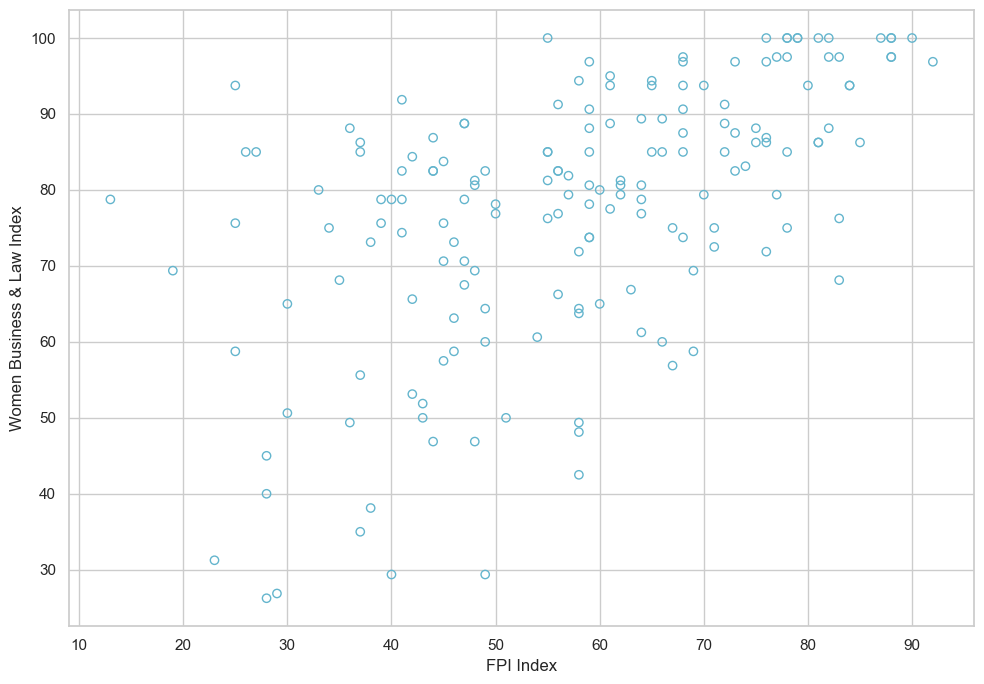

In [33]:
# Scatter plot looking at FPI index to Women in Business and Law Index
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

ax.scatter(countries_df['FPI'], countries_df['Women in Business/Law'], color='C9', facecolor='none') #facecolor none leaves the bubble unfilled
plt.xlabel('FPI Index')
plt.ylabel('Women Business & Law Index')

plt.tight_layout()
plt.show()

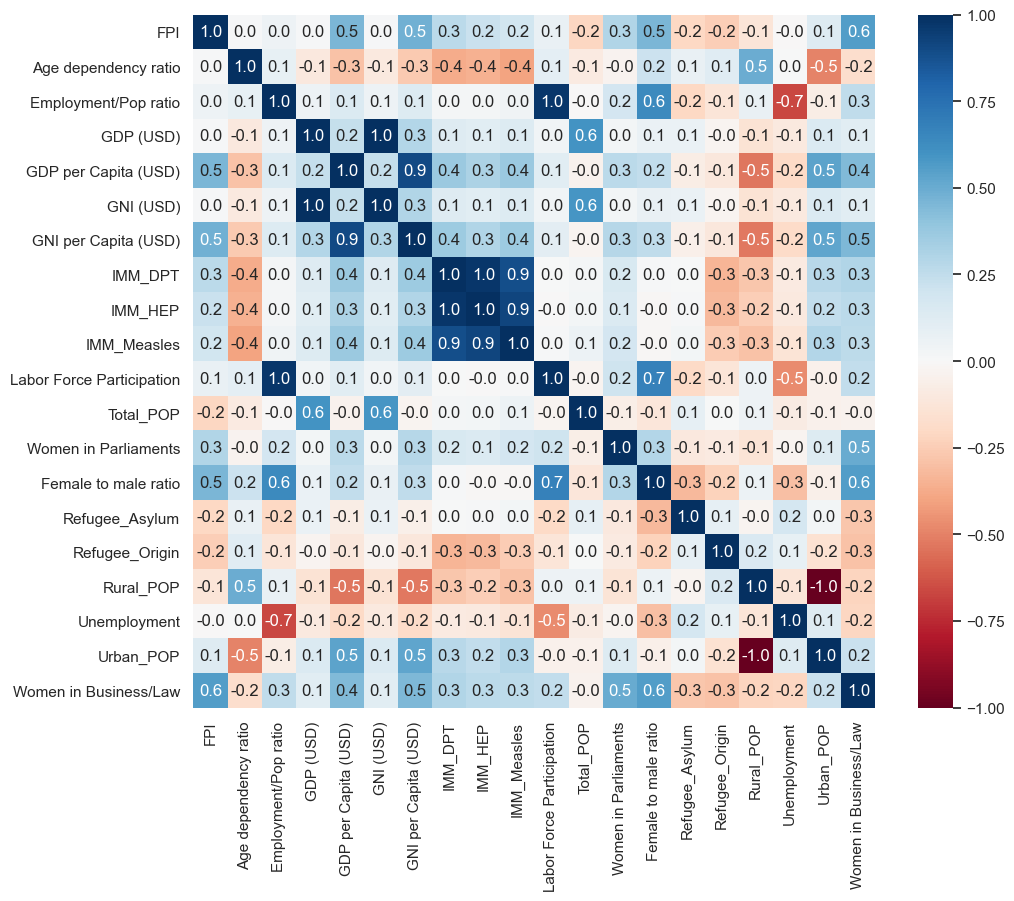

In [34]:
# Data Frame heat map

corr = countries_df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(11, 9)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

 FPI analysis

In [35]:
#the mean value of variables groupby FPI_Level
countries_df.groupby(['FPI_Level']).mean()

,FPI,Age dependency ratio,Employment/Pop ratio,GDP (USD),GDP per Capita (USD),GNI (USD),GNI per Capita (USD),IMM_DPT,IMM_HEP,IMM_Measles,Labor Force Participation,Total_POP,Women in Parliaments,Female to male ratio,Refugee_Asylum,Refugee_Origin,Rural_POP,Unemployment,Urban_POP,Women in Business/Law
FPI_Level,,,,,,,,,,,,,,,,,,,,
difficult,46.976190,61.623430,58.402595,306444188147.273743,8937.026731,307469782038.922302,8026.904762,80.428571,80.285714,80.857143,62.735428,80178546.309524,24.089072,69.622756,316989.976190,142888.095238,40.864881,7.678476,59.135119,71.800595
good,84.842105,56.207723,58.426474,536871275079.263245,42963.466062,538773921880.641052,40350.263158,93.210526,90.631579,91.894737,63.209131,10232841.526316,37.154803,84.381966,100266.447368,222.526316,30.370105,7.707632,69.629895,92.927632
problematic,62.250000,62.610794,54.651875,192927867743.817688,9502.844238,197488468790.470612,8758.839286,82.107143,81.125000,77.964286,59.802009,13189085.392857,22.688473,75.243295,37271.910714,19828.571429,44.020839,8.871964,55.979161,78.973214
satisfactory,75.500000,56.297232,53.359616,1458615656738.502930,28419.396659,1477642451203.812988,23366.538462,91.192308,90.692308,90.423077,57.989154,31983546.961538,29.613272,78.697946,68034.750000,3131.538462,32.630538,8.167769,67.369462,88.725962
very serious,31.448276,54.482699,51.517000,808971574815.348511,5993.782891,775028278188.655762,4662.068966,82.517241,82.517241,83.241379,55.538724,91451856.413793,22.463124,52.714403,291047.310345,475111.344828,41.204517,8.341000,58.795483,63.017241


In [36]:
#the prop of FPI_level
countries_df['FPI_Level'].value_counts(normalize=True)

problematic    0.325581
difficult      0.244186
very serious   0.168605
satisfactory   0.151163
good           0.110465
Name: FPI_Level, dtype: float64

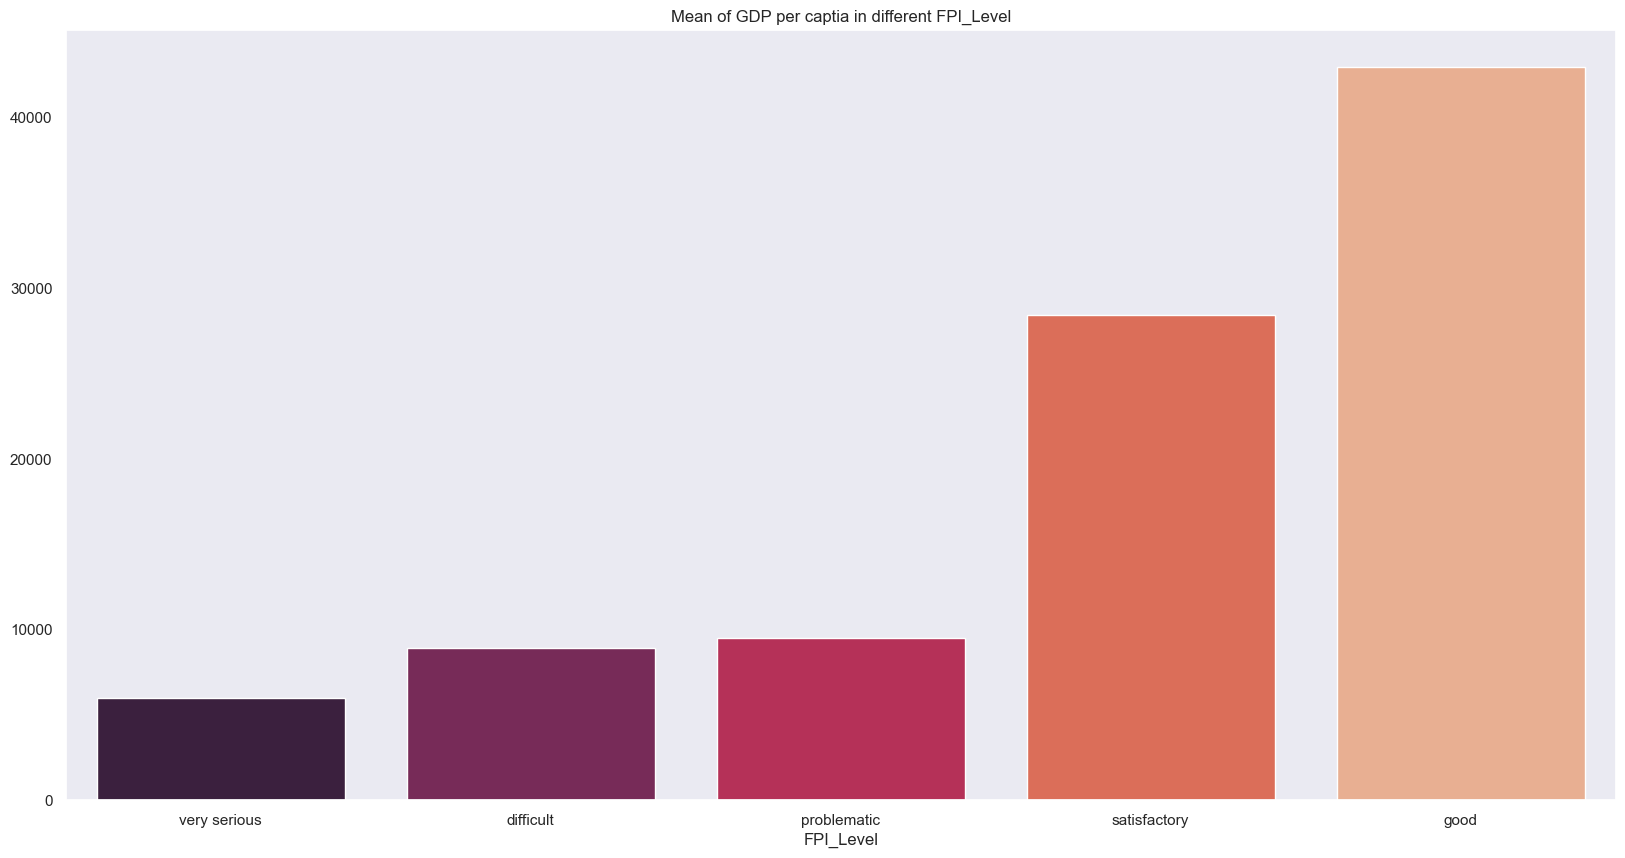

In [37]:
#Mean of GDP per captia in different FPI_Level
data = countries_df.groupby(['FPI_Level']).mean()['GDP per Capita (USD)'].sort_values(ascending=True)
sns.set_style("dark")
plt.figure(figsize=(20,10))
sns.barplot(x=data.index, y=data.values,palette="rocket").set(title='Mean of GDP per captia in different FPI_Level')
plt.show()

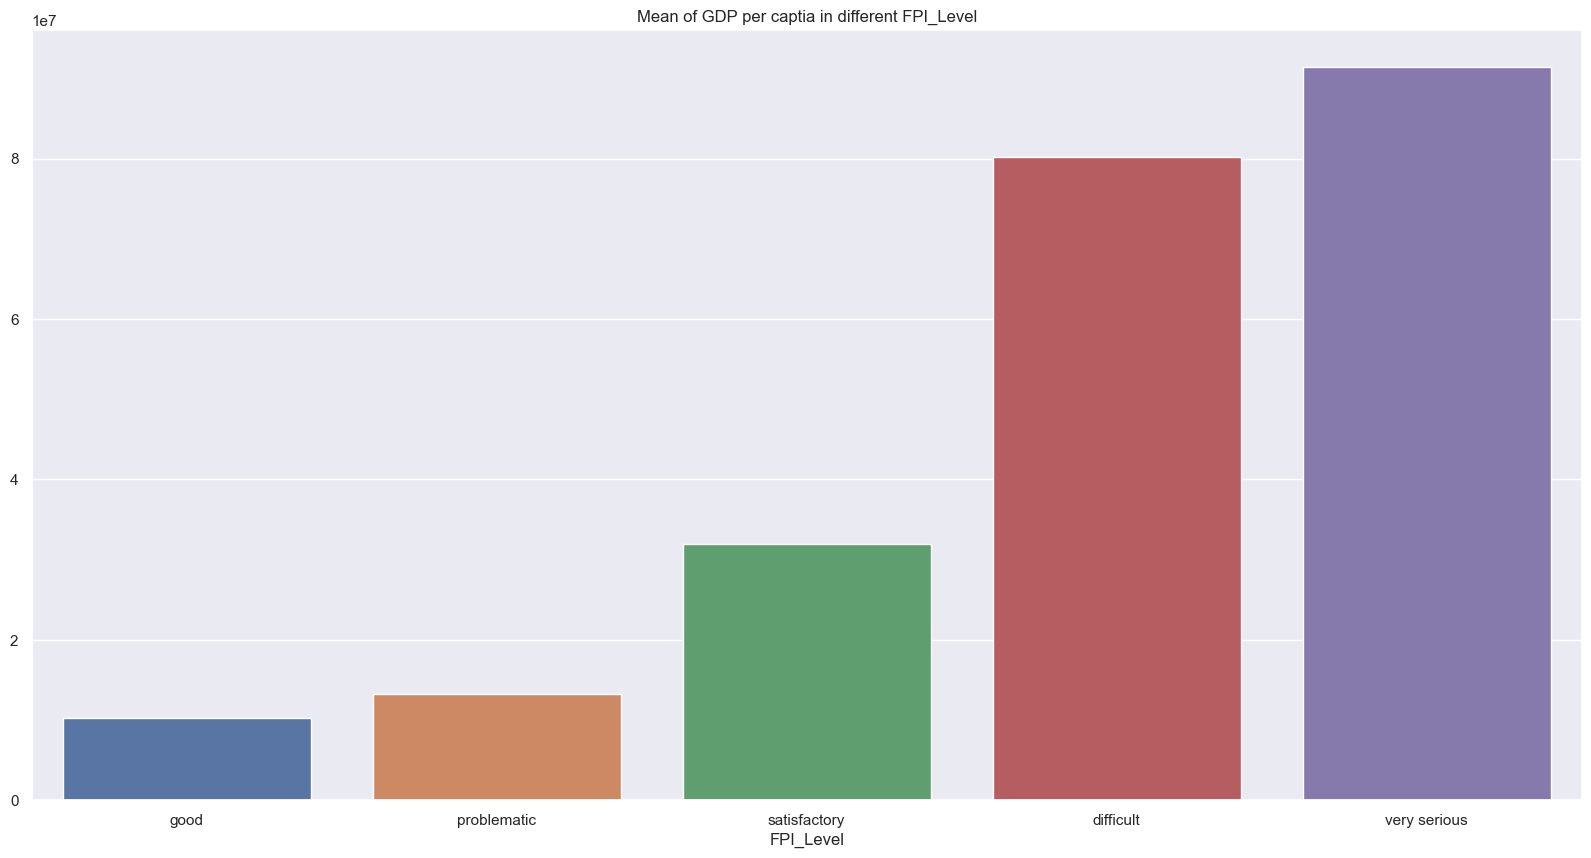

In [38]:
#Mean of GDP per captia in different FPI_Level
data = countries_df.groupby(['FPI_Level']).mean()['Total_POP'].sort_values(ascending=True)
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.barplot(x=data.index, y=data.values).set(title='Total population in different FPI_Level')
plt.show()

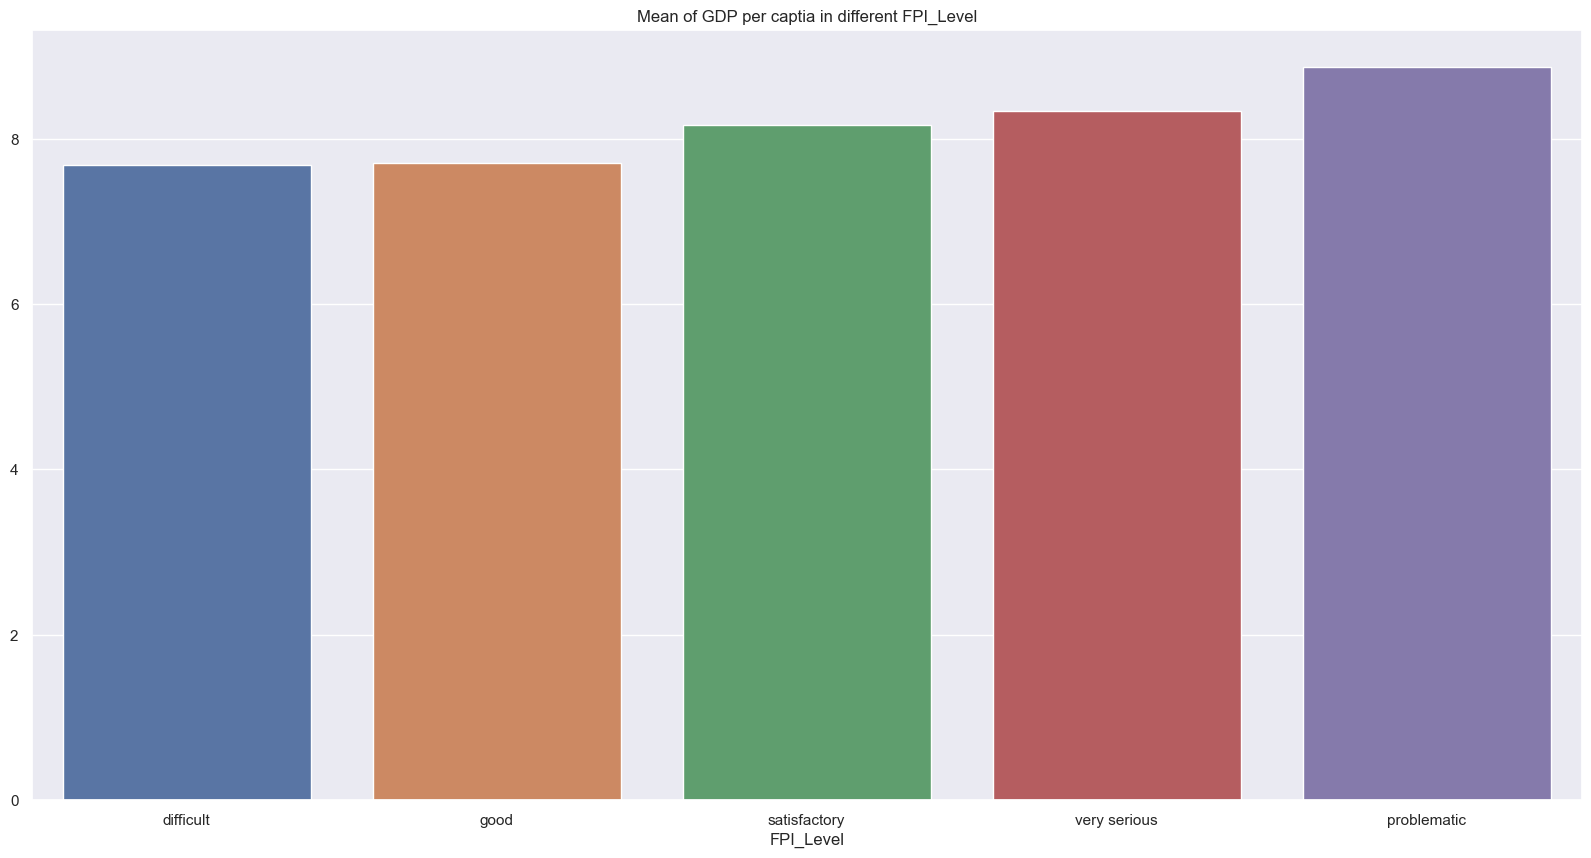

In [39]:
#Mean of unemployment in different FPI_Level
data = countries_df.groupby(['FPI_Level']).mean()['Unemployment'].sort_values(ascending=True)
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.barplot(x=data.index, y=data.values).set(title='Unemployment in different FPI_Level')
plt.show()

# Multiple Linear Regression to Predict FPI

In [40]:
countries_df.columns

Index(['Country Name', 'Income Group', 'Region', 'FPI', 'Age dependency ratio',
       'Employment/Pop ratio', 'GDP (USD)', 'GDP per Capita (USD)',
       'GNI (USD)', 'GNI per Capita (USD)', 'IMM_DPT', 'IMM_HEP',
       'IMM_Measles', 'Labor Force Participation', 'Total_POP',
       'Women in Parliaments', 'Female to male ratio', 'Refugee_Asylum',
       'Refugee_Origin', 'Rural_POP', 'Unemployment', 'Urban_POP',
       'Women in Business/Law', 'FPI_Level'],
      dtype='object')

In [41]:
#Choose several predictors that I think will be useful for first regression

predictors = ['Income Group', 'Region', 'Age dependency ratio',
       'Employment/Pop ratio', 'GDP per Capita (USD)',
     'IMM_DPT', 'Labor Force Participation', 'Total_POP',
       'Women in Parliaments', 'Female to male ratio', 'Refugee_Asylum',
       'Refugee_Origin', 'Rural_POP', 'Unemployment', 'Urban_POP',
       'Women in Business/Law']
outcome = 'FPI'

# partition data
X = pd.get_dummies(countries_df[predictors], drop_first=True)
y = countries_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

countries_lm = LinearRegression()
countries_lm.fit(train_X, train_y)

#Print the adjusted r squared for the training data
pred_y = countries_lm.predict(train_X)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, countries_lm))

# print performance measures ON THE VALIDATION DATA
regressionSummary(valid_y, countries_lm.predict(valid_X))

adjusted r2 :  0.6039278948403033

Regression statistics

                      Mean Error (ME) : -0.3162
       Root Mean Squared Error (RMSE) : 16.2478
            Mean Absolute Error (MAE) : 12.4350
          Mean Percentage Error (MPE) : -8.4661
Mean Absolute Percentage Error (MAPE) : 30.0288


In [42]:
#Running a Backward Elimination Model
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestBE_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)
print()

# print performance measures ON THE VALIDATION DATA
regressionSummary(valid_y, bestBE_model.predict(valid_X[best_variables]))

Variables: Age dependency ratio, Employment/Pop ratio, GDP per Capita (USD), IMM_DPT, Labor Force Participation, Total_POP, Women in Parliaments, Female to male ratio, Refugee_Asylum, Refugee_Origin, Rural_POP, Unemployment, Urban_POP, Women in Business/Law, Income Group_Low income, Income Group_Lower middle income, Income Group_Missing, Income Group_Upper middle income, Region_Europe & Central Asia, Region_Latin America & Caribbean, Region_Middle East & North Africa, Region_North America, Region_South Asia, Region_Sub-Saharan Africa
Start: score=803.01
Step: score=801.01, remove Rural_POP
Step: score=799.01, remove Income Group_Missing
Step: score=797.02, remove Region_South Asia
Step: score=795.11, remove IMM_DPT
Step: score=793.26, remove Urban_POP
Step: score=791.69, remove Refugee_Asylum
Step: score=790.14, remove Region_Latin America & Caribbean
Step: score=788.45, remove GDP per Capita (USD)
Step: score=786.71, remove Region_Sub-Saharan Africa
Step: score=785.41, remove Region_N

In [43]:
# The initial model is the constant model - this requires special handling in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestFS_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)
print()

# print performance measures ON THE VALIDATION DATA
regressionSummary(valid_y, bestFS_model.predict(valid_X[best_variables]))

Variables: Age dependency ratio, Employment/Pop ratio, GDP per Capita (USD), IMM_DPT, Labor Force Participation, Total_POP, Women in Parliaments, Female to male ratio, Refugee_Asylum, Refugee_Origin, Rural_POP, Unemployment, Urban_POP, Women in Business/Law, Income Group_Low income, Income Group_Lower middle income, Income Group_Missing, Income Group_Upper middle income, Region_Europe & Central Asia, Region_Latin America & Caribbean, Region_Middle East & North Africa, Region_North America, Region_South Asia, Region_Sub-Saharan Africa
Start: score=878.03, constant
Step: score=821.39, add Women in Business/Law
Step: score=813.43, add Region_Middle East & North Africa
Step: score=807.83, add GDP per Capita (USD)
Step: score=800.70, add Total_POP
Step: score=797.06, add Employment/Pop ratio
Step: score=792.99, add Region_Sub-Saharan Africa
Step: score=790.95, add Region_Latin America & Caribbean
Step: score=789.74, add Female to male ratio
Step: score=789.21, add IMM_DPT
Step: score=789.21

In [44]:
#Playing around to get a better regression

predictors = ['Income Group', 'Region', 
     'GDP per Capita (USD)',
     'Labor Force Participation', 'IMM_DPT',
      'Female to male ratio', 
       'Refugee_Origin', 'Rural_POP', 'Urban_POP']
outcome = 'FPI'

# partition data
X = pd.get_dummies(countries_df[predictors], drop_first=True)
y = countries_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

countries_lm = LinearRegression()
countries_lm.fit(train_X, train_y)

#Print the adjusted r squared for the training data
pred_y = countries_lm.predict(train_X)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, countries_lm))

# print performance measures ON THE VALIDATION DATA
regressionSummary(valid_y, countries_lm.predict(valid_X))
# print coefficients
print('intercept ', countries_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': countries_lm.coef_}))

adjusted r2 :  0.5513481468805947

Regression statistics

                      Mean Error (ME) : -1.4691
       Root Mean Squared Error (RMSE) : 14.2834
            Mean Absolute Error (MAE) : 10.9050
          Mean Percentage Error (MPE) : -12.1847
Mean Absolute Percentage Error (MAPE) : 25.9673
intercept  59.40686898125886
                            Predictor  coefficient
0                GDP per Capita (USD)     0.000208
1           Labor Force Participation    -0.717755
2                             IMM_DPT     0.149201
3                Female to male ratio     0.418086
4                      Refugee_Origin    -0.000001
5                           Rural_POP     0.033892
6                           Urban_POP    -0.033892
7             Income Group_Low income   -15.711131
8    Income Group_Lower middle income   -12.996543
9                Income Group_Missing    -0.000000
10   Income Group_Upper middle income    -8.305540
11       Region_Europe & Central Asia     2.142820
12   Regi

# Logit Regression

Ordinal logistic regression (5 outcomes)

In [45]:
countries_df['ordi_FPI_Level'] = [ 0 if index == 'very serious'
                                    else 1 if index == 'difficult'
                                    else 2 if index == 'problematic'
                                    else 3 if index == 'satisfactory'
                                    else 4
                             for index in countries_df['FPI_Level']]

In [46]:
countries_df['Income Group'] = countries_df['Income Group'].astype('category')
countries_df['Region'] = countries_df['Region'].astype('category')

In [47]:
outcome = 'ordi_FPI_Level'
predictors =['Income Group', 'Region', 'IMM_DPT',
     'GDP per Capita (USD)',
     'Labor Force Participation', 
      'Female to male ratio', 
       'Refugee_Origin', 'Rural_POP', 'Urban_POP']

In [48]:

X = pd.get_dummies(countries_df[predictors]) 
y = countries_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

model = LogisticAT()
model.fit(train_X, train_y)
intercept = model.theta_
print('Ordinal logistic regression')
print()
for variable, coefficient in zip(train_X.columns, model.coef_):
    print(f'{variable}: {round(coefficient,4)}')
print(f'Intercept: {intercept}')

predictions = model.predict(train_X)
probabilities = model.predict_proba(train_X)
probs = model.predict_proba(train_X)
results = pd.DataFrame({
'actual': train_y, 'predicted': model.predict(train_X),
'P(0)': [p[0] for p in probs],
'P(1)': [p[1] for p in probs],
'P(2)': [p[2] for p in probs],
    'P(3)': [p[3] for p in probs],
    'P(4)': [p[4] for p in probs],
})

print(results.sample(5))
print()
accuracy = accuracy_score(train_y, predictions)
accuracy

NameError: name 'LogisticAT' is not defined

In [ ]:
#Valid data
probs = model.predict_proba(valid_X)
results = pd.DataFrame({
'actual': valid_y, 'predicted': model.predict(valid_X),
'P(0)': [p[0] for p in probs],
'P(1)': [p[1] for p in probs],
'P(2)': [p[2] for p in probs],
    'P(3)': [p[3] for p in probs],
    'P(4)': [p[4] for p in probs],
})
print(results.sample(5))
print()
accuracy = accuracy_score(valid_y, model.predict(valid_X))
accuracy

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, model.predict(valid_X)))

In this particular classification report, the values of the precision, recall, and f1-score metrics are relatively low for some of the class labels, but they are higher for other class labels. For example, the f1-score for class 0 is 0.37, which is relatively low, but the f1-score for class 4 is 0.62, which is relatively high. This indicates that the model is making accurate predictions and is capturing most of the positive cases for some classes, but not for other classes.

Binary Outcome

In [33]:
countries_df['binary_FPI_Level'] = [ 0 if index <=70
                             else 1
                             for index in countries_df['FPI']]

In [ ]:
outcome = 'binary_FPI_Level'
predictors =['Income Group', 'Region', 'IMM_DPT',
     'GDP per Capita (USD)',
     'Labor Force Participation', 
      'Female to male ratio', 
       'Refugee_Origin', 'Rural_POP', 'Urban_POP']

In [ ]:
X = pd.get_dummies(countries_df[predictors]) 
y = countries_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))
classificationSummary(train_y, logit_reg.predict(train_X))

In [ ]:
#Valid data
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

# display four different cases
interestingCases = [4, 125, 51, 158]
print(logit_result.loc[interestingCases])

#Use the classification summary function for validation data
classificationSummary(valid_y, logit_reg.predict(valid_X))

In [ ]:
logit_df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(logit_df.actual, ax=axes[0])
liftChart(logit_df.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()

# Classification Tree with outcome variable FPI_Level

In [34]:
countries_df.head()

,Country Name,Income Group,Region,FPI,Age dependency ratio,Employment/Pop ratio,GDP (USD),GDP per Capita (USD),GNI (USD),GNI per Capita (USD),IMM_DPT,IMM_HEP,IMM_Measles,Labor Force Participation,Total_POP,Women in Parliaments,Female to male ratio,Refugee_Asylum,Refugee_Origin,Rural_POP,Unemployment,Urban_POP,Women in Business/Law,FPI_Level,binary_FPI_Level
0,Afghanistan,Low income,South Asia,38.000000,78.214069,35.893002,215431000439.343811,2390.239113,212102277408.457825,2395.000000,66.000000,66.000000,63.000000,41.390999,39835428.000000,27.016129,22.322784,66949.000000,2712858.000000,73.686000,13.283000,26.314000,38.125000,very serious,0
1,Albania,Upper middle income,Europe & Central Asia,56.000000,47.744242,51.609001,18260043499.806801,6494.385713,18010445095.633694,6110.000000,98.000000,98.000000,87.000000,58.527000,2811666.000000,35.714286,76.689244,109.000000,19847.000000,37.031000,11.819000,62.969000,91.250000,problematic,0
2,Algeria,Lower middle income,Middle East & North Africa,45.000000,60.858223,35.113998,167983141738.311493,3765.034625,163926142939.960480,3660.000000,91.000000,91.000000,80.000000,40.223000,44616626.000000,8.108108,24.323820,97890.000000,6003.000000,25.739000,12.704000,74.261000,57.500000,difficult,0
3,Andorra,High income,Europe & Central Asia,68.000000,54.554892,55.231001,3329910723.760784,43047.686270,171667523525.097565,19755.000000,99.000000,98.000000,99.000000,58.726500,77354.000000,46.428571,80.949416,5676.000000,563.000000,12.142000,6.608000,87.858000,93.750000,problematic,0
4,Angola,Lower middle income,Sub-Saharan Africa,57.000000,93.637469,69.936996,72546985708.570663,2137.909393,66833691182.161034,1770.000000,45.000000,41.000000,36.000000,76.459000,33933611.000000,29.545455,93.546310,26045.000000,11403.000000,32.540000,8.530000,67.460000,79.375000,problematic,0


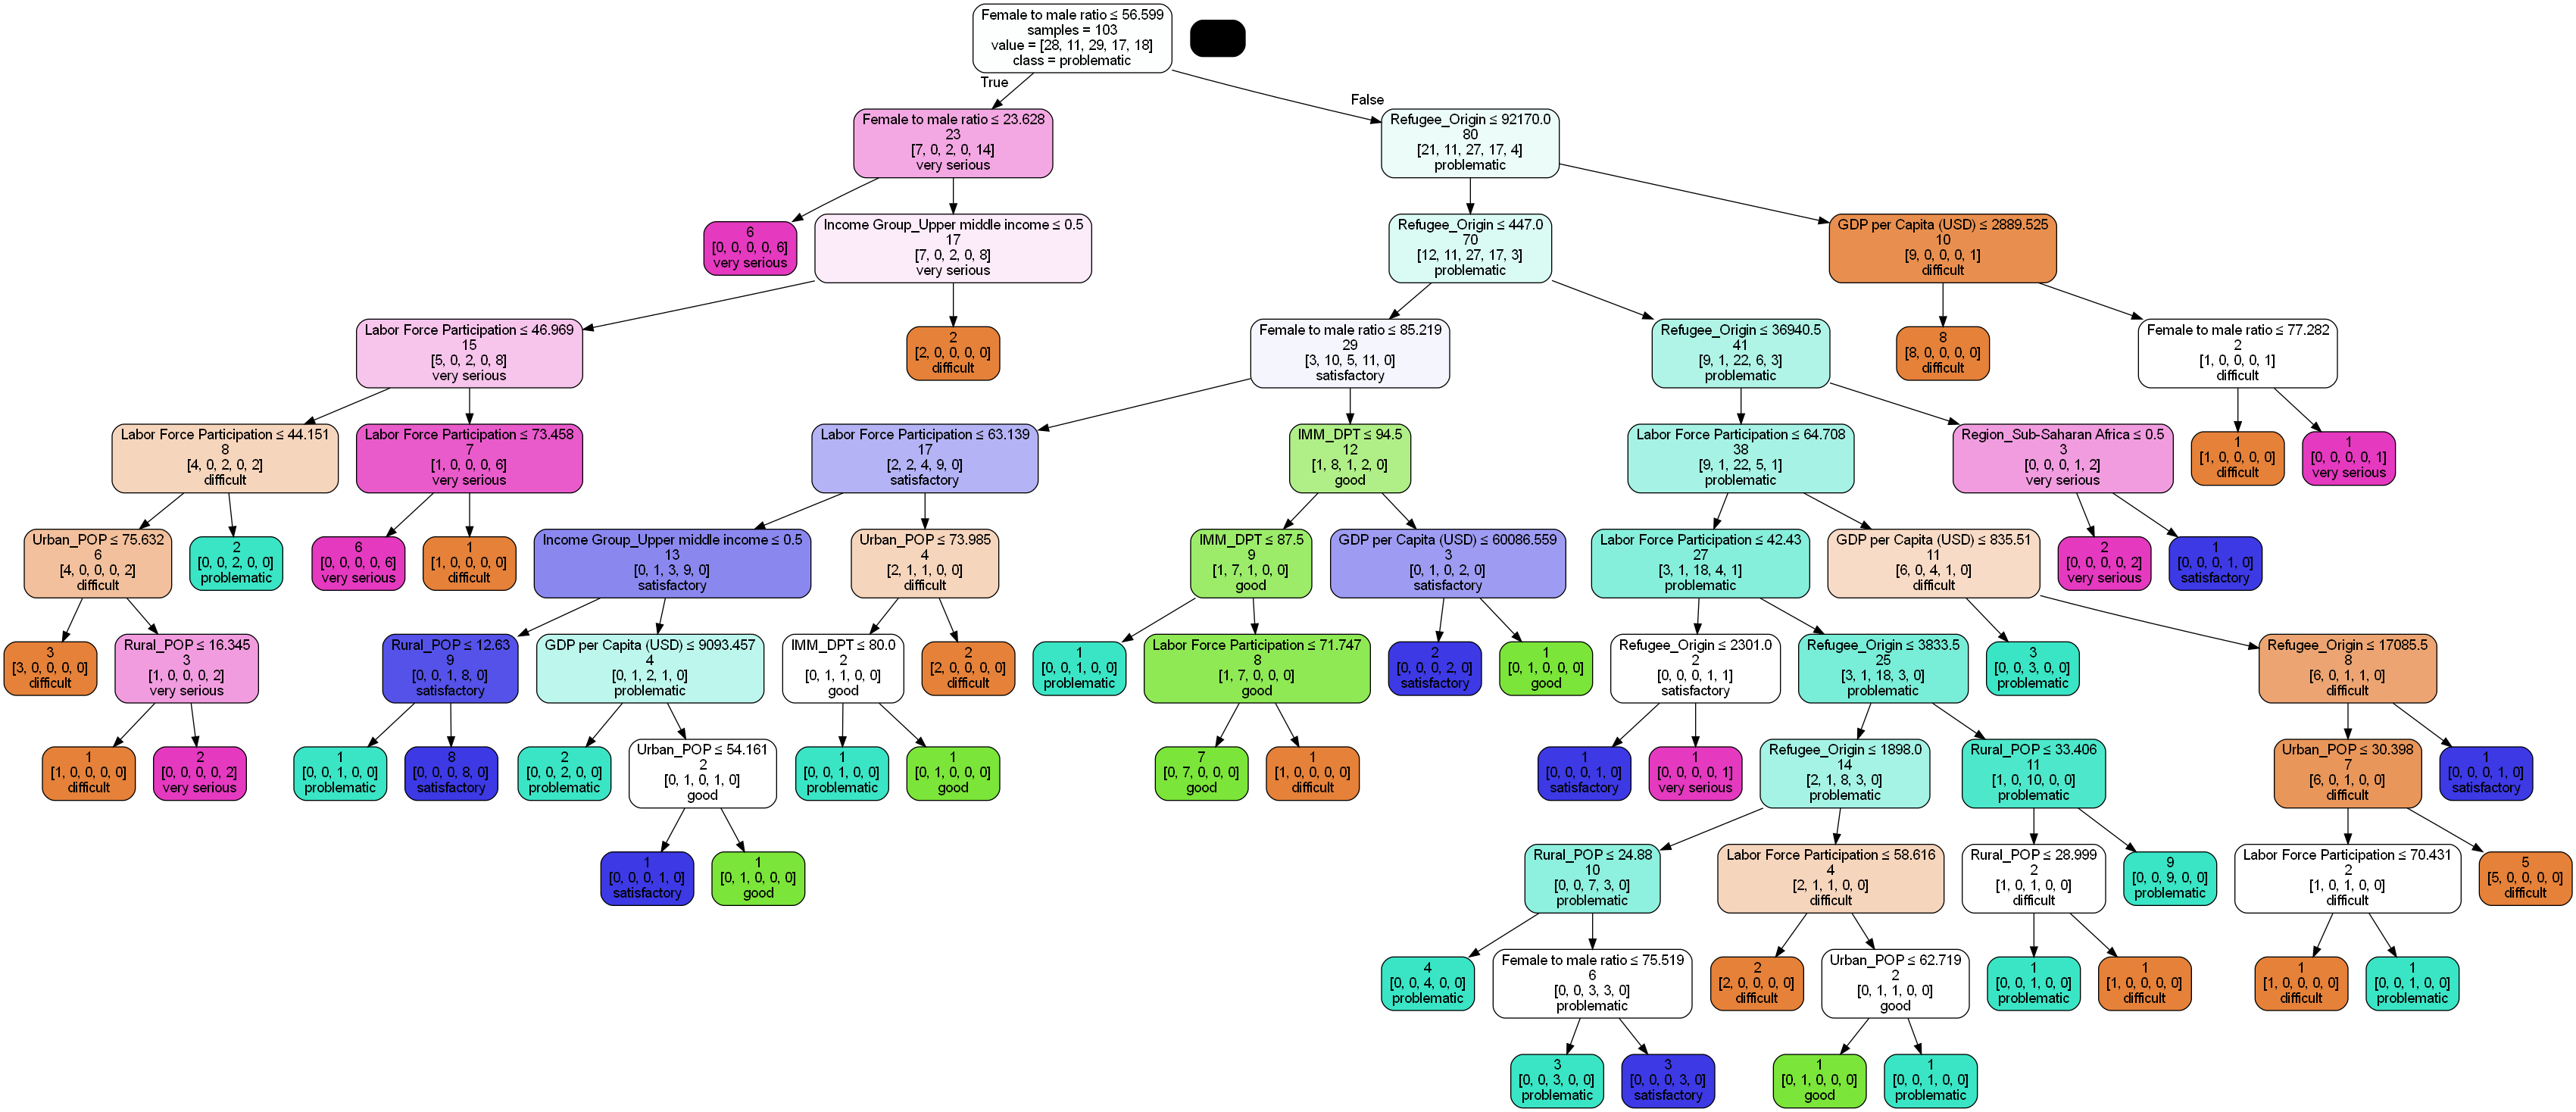

In [21]:
predictors = ['Income Group', 'Region', 
     'GDP per Capita (USD)',
     'Labor Force Participation', 'IMM_DPT',
      'Female to male ratio', 
       'Refugee_Origin', 'Rural_POP', 'Urban_POP']

outcome = 'FPI_Level'

#Separate X and y variables
X = pd.get_dummies(countries_df[predictors], prefix_sep='_', drop_first=True)
y = countries_df[outcome]

#Partition
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

#Develop trees
CountryClassTree = DecisionTreeClassifier()
CountryClassTree.fit(train_X, train_y)

plotDecisionTree(CountryClassTree, feature_names=train_X.columns,class_names=CountryClassTree.classes_)

In [23]:
# accuracy on the training data
print(accuracy_score(train_y, CountryClassTree.predict(train_X)))
#Calculate accuracy for validation data
print(accuracy_score(valid_y, CountryClassTree.predict(valid_X)))

1.0
0.2898550724637681


In [24]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
} # 4*5*4=100 combinations
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# give you the best in the list

Initial score:  0.4471428571428572
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [25]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': (3,7), 
    'min_samples_split': (18,24), 
    'min_impurity_decrease': [0.00001]
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.42857142857142855
Improved parameters:  {'max_depth': 3, 'min_impurity_decrease': 1e-05, 'min_samples_split': 24}


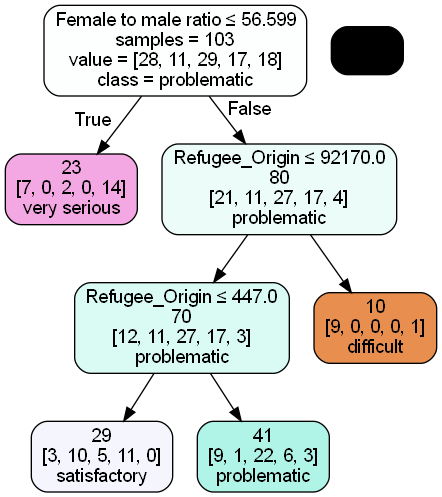

In [26]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns,class_names=bestClassTree.classes_)

In [27]:
# accuracy score on validation dataset
classificationSummary(valid_y, bestClassTree.predict(valid_X))
# after prunning accuracy score somehow dropped

Confusion Matrix (Accuracy 0.3188)

       Prediction
Actual  0  1  2  3  4
     0  0  0  4  6  4
     1  0  0  1  7  0
     2  1  0 15  9  2
     3  0  0  4  5  0
     4  3  0  6  0  2


In [28]:
# Cross Validation
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.476', '0.238', '0.429', '0.150', '0.350']
Accuracy: 0.329 (+/- 0.241)
Accuracy: 0.329 (+/- 0.120)


Random Forest

                              feature  importance      std
9                Income Group_Missing    0.000000 0.000000
14               Region_North America    0.001989 0.006406
15                  Region_South Asia    0.002219 0.008167
7             Income Group_Low income    0.007910 0.015706
12   Region_Latin America & Caribbean    0.010901 0.015329
10   Income Group_Upper middle income    0.013714 0.017625
8    Income Group_Lower middle income    0.016020 0.019303
11       Region_Europe & Central Asia    0.016772 0.021082
16          Region_Sub-Saharan Africa    0.024040 0.027584
13  Region_Middle East & North Africa    0.024517 0.033264
6                           Urban_POP    0.091922 0.052026
2                             IMM_DPT    0.094071 0.052773
5                           Rural_POP    0.095677 0.055501
0                GDP per Capita (USD)    0.125004 0.063010
3                Female to male ratio    0.149428 0.078632
1           Labor Force Participation    0.154877 0.0726

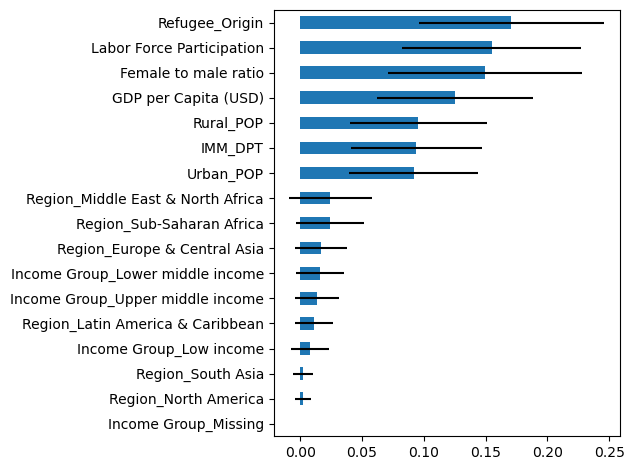

In [29]:
# This method improve the stability of model
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()
# the plot tells us which variable is more important

In [30]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.4058)

       Prediction
Actual  0  1  2  3  4
     0  7  0  3  1  3
     1  1  3  0  4  0
     2  7  1 14  4  1
     3  2  1  4  2  0
     4  6  0  2  1  2


Bossted Tree

In [31]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.3333)

       Prediction
Actual  0  1  2  3  4
     0  6  0  5  2  1
     1  0  3  1  4  0
     2  7  2 12  6  0
     3  1  1  6  1  0
     4  7  0  3  0  1


# Classification Tree with Binary FPI 

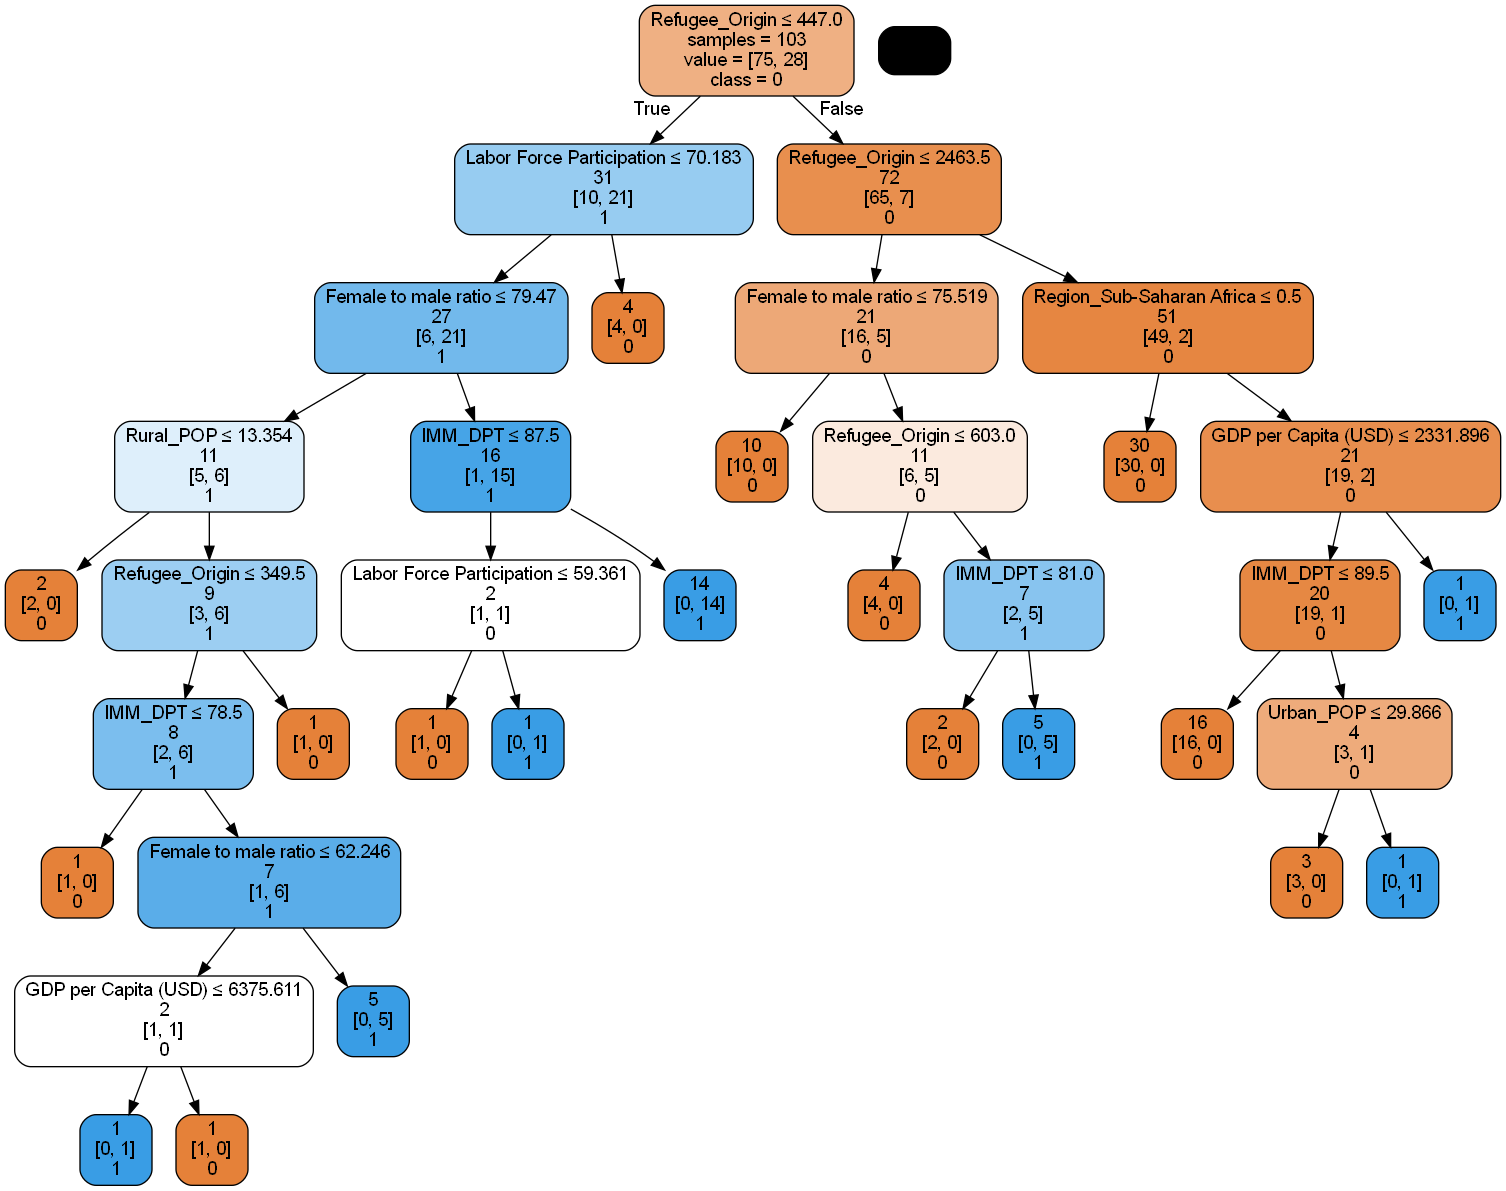

In [61]:
predictors = ['Income Group', 'Region', 
     'GDP per Capita (USD)',
     'Labor Force Participation', 'IMM_DPT',
      'Female to male ratio', 
       'Refugee_Origin', 'Rural_POP', 'Urban_POP']

outcome = 'binary_FPI_Level'

#Separate X and y variables
X = pd.get_dummies(countries_df[predictors], prefix_sep='_', drop_first=True)
y = countries_df[outcome]

#Partition
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

#Develop trees
CountryClassTree = DecisionTreeClassifier()
CountryClassTree.fit(train_X, train_y)

plotDecisionTree(CountryClassTree, feature_names=train_X.columns,class_names=CountryClassTree.classes_)

In [62]:
#Calculate accuracy for validation data
accuracy_score(valid_y, CountryClassTree.predict(valid_X))

0.7391304347826086

grid search

In [70]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
} # 4*5*4=100 combinations
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# give you the best in the list

Initial score:  0.7871428571428571
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 60}


In [71]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': (8,14), 
    'min_samples_split': (55,65), 
    'min_impurity_decrease': [0.00001]
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.7871428571428571
Improved parameters:  {'max_depth': 8, 'min_impurity_decrease': 1e-05, 'min_samples_split': 55}


In [72]:
# accuracy score on validation dataset
classificationSummary(valid_y, bestClassTree.predict(valid_X))
# after prunning accuracy score somehow dropped

Confusion Matrix (Accuracy 0.6812)

       Prediction
Actual  0  1
     0 35 17
     1  5 12


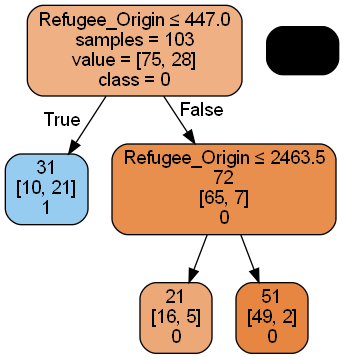

In [73]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns,class_names=bestClassTree.classes_)

Random Forest

                              feature  importance      std
9                Income Group_Missing    0.000000 0.000000
15                  Region_South Asia    0.000050 0.000674
14               Region_North America    0.004046 0.018031
8    Income Group_Lower middle income    0.007361 0.019446
7             Income Group_Low income    0.009179 0.023491
10   Income Group_Upper middle income    0.012149 0.023768
12   Region_Latin America & Caribbean    0.013207 0.026556
13  Region_Middle East & North Africa    0.015276 0.032648
16          Region_Sub-Saharan Africa    0.015657 0.031100
11       Region_Europe & Central Asia    0.017132 0.033189
5                           Rural_POP    0.089661 0.084978
6                           Urban_POP    0.091210 0.080913
2                             IMM_DPT    0.095870 0.090825
1           Labor Force Participation    0.098265 0.092488
3                Female to male ratio    0.118280 0.108866
0                GDP per Capita (USD)    0.166104 0.1488

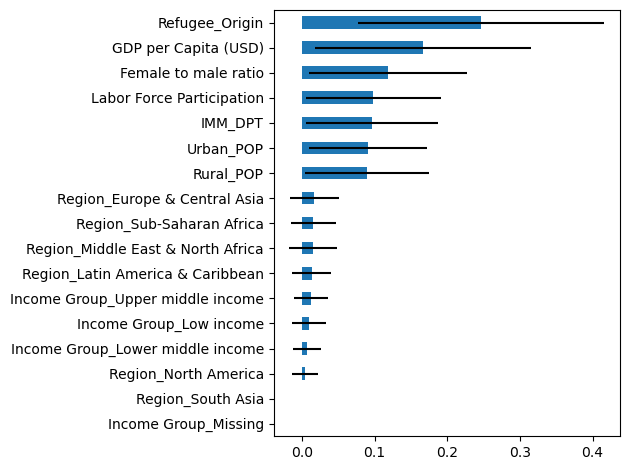

In [74]:
# This method improve the stability of model
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()
# the plot tells us which variable is more important

In [75]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.7826)

       Prediction
Actual  0  1
     0 44  8
     1  7 10


Boosted Trees

In [76]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.7826)

       Prediction
Actual  0  1
     0 42 10
     1  5 12


# Regreession Tree with FPI numerical outcome

In [40]:
predictors = ['Income Group', 'Region', 
     'GDP per Capita (USD)',
     'Labor Force Participation', 'IMM_DPT',
      'Female to male ratio', 
       'Refugee_Origin', 'Rural_POP', 'Urban_POP']
outcome = 'FPI'

#Separate X and y variables
X = pd.get_dummies(countries_df[predictors], prefix_sep='_', drop_first=True)
y = countries_df[outcome]

#Partition
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_grid = {
 'max_depth': [5, 10, 15, 20, 25], 
 'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
 'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)
param_grid = {
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
 'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
 'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)
regTree = gridSearch.best_estimator_
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 30}
Improved parameters:  {'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_split': 15}

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 9.6147
            Mean Absolute Error (MAE) : 7.3328
          Mean Percentage Error (MPE) : -3.0850
Mean Absolute Percentage Error (MAPE) : 13.7548

Regression statistics

                      Mean Error (ME) : -4.9138
       Root Mean Squared Error (RMSE) : 15.7752
            Mean Absolute Error (MAE) : 12.1912
          Mean Percentage Error (MPE) : -20.9351
Mean Absolute Percentage Error (MAPE) : 31.2930


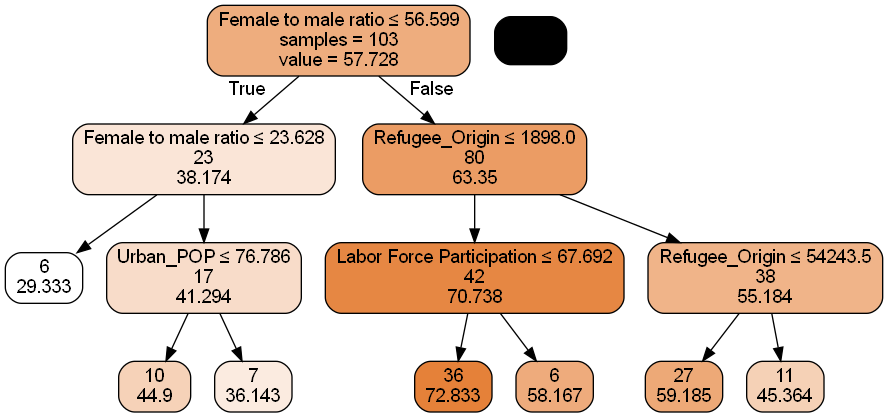

In [41]:
#plotDecisionTree(CountryClassTree, feature_names=train_X.columns)
plotDecisionTree(regTree, feature_names=train_X.columns)

# Clustering the WDI Data

# Setting Index & Normalization

In [ ]:
#set row names (index) to the utilities column (company) and remove it.
clust_df = countries_df
clust_df = clust_df.drop(columns = ['Income Group', 'Region', 'FPI_Level', 'GNI (USD)', 'GNI per Capita (USD)', 'IMM_DPT', 'IMM_HEP'])
clust_df.set_index('Country Name', inplace=True)

# Convert all columns to 'float'. While this step is not required, the conversion of integer data to float will avoid a warning when 
# applying the scale function
#clust_df = clust_df.apply(lambda x: x.astype('float64')) #lambda is used for custom functions. 
clust_df.head()

In [ ]:
# Normalize the data columns
clust_df_norm = (clust_df - clust_df.mean()) / clust_df.std()
clust_df_norm.head()

# Clustering Using Ward Method

In [ ]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(clust_df_norm, method='ward', metric = 'euclidean') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Customer')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=clust_df_norm.index, color_threshold=23)
plt.axhline(y=23, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [ ]:
memb = fcluster(Z, 3, criterion='maxclust') #no more than 3 clusters
print(memb)

#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=clust_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

In [ ]:
#Add the membership number, that is, the cluster number to the index
clust_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, clust_df.index)]

#Cluster map (aka Heat map)
sns.clustermap(clust_df_norm, method='ward', metric= 'euclidean', col_cluster=False,  cmap="mako_r") 
#mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

In [ ]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
clust_df_norm.index = clust_df.index
clust_mean_norm = clust_df_norm.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 

clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Means of Normalized Input Variables for Clusters with Ward Linkage Method')
print(clust_mean_norm)

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)

for cluster, data in clust_df.groupby(memb):
    count = len(data)
    print(f'Cluster {cluster} ({count} members)')

plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()

# Neural Networks

In [ ]:
#Prepare Data for Neural Networks
countries_df['FPI_Binary'] = [1 if index > 70
                              else 0
                             for index in countries_df['FPI']]
#countries_df[['FPI_Binary', 'FPI']].sample(50)

#Normalize the variables according to the recommendation in the book: Xnorm = (X - a) / (b - a)
#where [a,b] is the range of X. We want all of the variables to be within 0 and 1

cntrs_numerical_df = countries_df[['GDP per Capita (USD)', 
     'Labor Force Participation', 'IMM_DPT',
      'Female to male ratio', 'Refugee_Origin', 
      'Rural_POP', 'Urban_POP', 'FPI']]
#cntrs_numerical_df.head()
countries_norm_df = (cntrs_numerical_df - cntrs_numerical_df.min(axis=0)) / (cntrs_numerical_df.max(axis=0) - cntrs_numerical_df.min(axis=0))
countries_norm_df = pd.concat([pd.DataFrame(countries_norm_df), countries_df[['FPI_Binary', 'FPI_Level', 'Income Group', 'Region']]], axis=1)
countries_norm_df.sample(50)

In [ ]:
countries_norm_df.dtypes

In [ ]:
#neural network with the predictorcs suggested by backward elimination
#FPI LEVEL included in input_vale on purpose as we filter the data down to just what we need
input_val = ['Income Group', 'Region', 
     'GDP per Capita (USD)', 'FPI_Level',
     'Labor Force Participation', 
      'Female to male ratio', 'IMM_DPT',
       'Refugee_Origin', 'Rural_POP', 'Urban_POP']
#NOTE: predictors are defined further down; input_val subsets data to variables of interest including outcome
outcome = 'FPI_Level'

#variables already define as categories - can omit
#countries_df.FPI_Level = countries_df.FPI_Level.astype('category')
#countries_df['Income Group'] = countries_df['Income Group'].astype('category')
#countries_df['Region'] = countries_df['Region'].astype('category')

processed = pd.get_dummies(countries_norm_df[input_val], columns=['Income Group', 'Region'])
processed = processed.drop(columns=['Income Group_Missing'])
#processed.columns
predictors = [c for c in processed.columns if c != outcome]
#predictors

# partition data
X2 = processed[predictors]
y2 = processed[outcome]
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=0.4, random_state=1)
processed.columns

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(11), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X2, train_y2.values)
#clf.predict(train_X2)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

# Prediction
#print(pd.concat([countries_df, pd.DataFrame(clf.predict_proba(X2))
#                    ], axis=1))

In [ ]:
#Obtain the classification summary
classificationSummary(train_y2, clf.predict(train_X2))

classificationSummary(valid_y2, clf.predict(valid_X2))

In [ ]:
#Repeat Neural Network but with Binary FPI
#Redo neural network with the predictorcs suggested by backward elimination
#FPI LEVEL included in input_vale on purpose as we filter the data down to just what we need
input_val = ['Income Group', 'Region', 
     'GDP per Capita (USD)', 'FPI_Binary',
     'Labor Force Participation', 'IMM_DPT',
      'Female to male ratio', 'Refugee_Origin', 
      'Rural_POP', 'Urban_POP'] #exclude categorical variables
outcome = 'FPI_Binary'

countries_df.FPI_Binary = countries_df.FPI_Binary.astype('category')
#countries_df['Income Group'] = countries_df['Income Group'].astype('category')
#countries_df['Region'] = countries_df['Region'].astype('category')

processed = pd.get_dummies(countries_norm_df[input_val], columns=['Income Group', 'Region'], drop_first=True)
processed = processed.drop(columns=['Income Group_Missing'])
#processed.columns
predictors = [c for c in processed.columns if c != outcome]
#predictors

# partition data
X2 = processed[predictors]
y2 = processed[outcome]
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=0.4, random_state=1)

In [ ]:
#trying different nodes
clf = MLPClassifier(hidden_layer_sizes=(7), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X2, train_y2.values)
#clf.predict(train_X2)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

# Prediction
#print(pd.concat([countries_df, pd.DataFrame(clf.predict_proba(X2))
#                    ], axis=1))

In [ ]:
#Obtain the classification summary
classificationSummary(train_y2, clf.predict(train_X2))

classificationSummary(valid_y2, clf.predict(valid_X2))

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(9), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X2, train_y2.values)
#clf.predict(train_X2)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

#Obtain the classification summary
classificationSummary(train_y2, clf.predict(train_X2))

classificationSummary(valid_y2, clf.predict(valid_X2))

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X2, train_y2.values)
#clf.predict(train_X2)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

#Obtain the classification summary
classificationSummary(train_y2, clf.predict(train_X2))

classificationSummary(valid_y2, clf.predict(valid_X2))

In [ ]:
#Repeat Neural Network but with Binary FPI - BEST ONE
#Redo neural network with the predictorcs suggested by backward elimination
#FPI LEVEL included in input_vale on purpose as we filter the data down to just what we need
input_val = ['Income Group', 'Region', 
     'GDP per Capita (USD)', 'FPI_Binary',
     'Labor Force Participation', 'IMM_DPT',
      'Female to male ratio', 'Refugee_Origin', 
      'Urban_POP'] #exclude categorical variables 'Rural_POP',
outcome = 'FPI_Binary'

countries_df.FPI_Binary = countries_df.FPI_Binary.astype('category')
#countries_df['Income Group'] = countries_df['Income Group'].astype('category')
#countries_df['Region'] = countries_df['Region'].astype('category')

processed = pd.get_dummies(countries_norm_df[input_val], columns=['Income Group', 'Region'], drop_first=True)
processed = processed.drop(columns=['Income Group_Missing'])
#processed.columns
predictors = [c for c in processed.columns if c != outcome]
#predictors

# partition data
X2 = processed[predictors]
y2 = processed[outcome]
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=0.4, random_state=1)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(9), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X2, train_y2.values)
#clf.predict(train_X2)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

#Obtain the classification summary
classificationSummary(train_y2, clf.predict(train_X2))

classificationSummary(valid_y2, clf.predict(valid_X2))

# K Nearest Neighbours

In [42]:
#Partition
train_countries, valid_countries = train_test_split(countries_df, test_size=0.4, random_state=1)

In [43]:
countries_df.columns

Index(['Country Name', 'Income Group', 'Region', 'FPI', 'Age dependency ratio',
       'Employment/Pop ratio', 'GDP (USD)', 'GDP per Capita (USD)',
       'GNI (USD)', 'GNI per Capita (USD)', 'IMM_DPT', 'IMM_HEP',
       'IMM_Measles', 'Labor Force Participation', 'Total_POP',
       'Women in Parliaments', 'Female to male ratio', 'Refugee_Asylum',
       'Refugee_Origin', 'Rural_POP', 'Unemployment', 'Urban_POP',
       'Women in Business/Law', 'FPI_Level', 'binary_FPI_Level'],
      dtype='object')

In [44]:
#input numeric variables:
Variables = ['GDP per Capita (USD)',
     'Labor Force Participation', 'IMM_DPT',
      'Female to male ratio',
       'Refugee_Origin', 'Rural_POP', 'Urban_POP']


#creating a new record 
sample_df = pd.DataFrame([{'GDP per Capita (USD)':'527118.95',
     'Labor Force Participation':'63.2', 'IMM_DPT':'91',
      'Female to male ratio':'87.96',
       'Refugee_Origin':'295', 'Rural_POP':'10.378', 'Urban_POP':'89.622'}])
sample_df

,GDP per Capita (USD),Labor Force Participation,IMM_DPT,Female to male ratio,Refugee_Origin,Rural_POP,Urban_POP
0,527118.95,63.2,91,87.96,295,10.378,89.622


In [45]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_countries[Variables])

# Transform the full dataset
countriesNorm = pd.concat([pd.DataFrame(scaler.transform(countries_df[Variables]), 
                                    columns=['zGDP per Capita (USD)',
     'zLabor Force Participation', 'zIMM_DPT',
      'zFemale to male ratio',
       'zRefugee_Origin', 'zRural_POP', 'zUrban_POP']),
                       countries_df[['Income Group', 'Region', 'binary_FPI_Level']]], axis=1)
trainNorm = countriesNorm.iloc[train_countries.index]
trainNorm.head()

ValidNorm = countriesNorm.iloc[valid_countries.index]
ValidNorm.head()

zVariables = ['zGDP per Capita (USD)','zLabor Force Participation', 'zIMM_DPT', 'zFemale to male ratio',
       'zRefugee_Origin', 'zRural_POP', 'zUrban_POP']

#Scale the new data
NewNorm = pd.DataFrame(scaler.transform(sample_df[Variables]),columns = [zVariables])
NewNorm.head()

,zGDP per Capita (USD),zLabor Force Participation,zIMM_DPT,zFemale to male ratio,zRefugee_Origin,zRural_POP,zUrban_POP
0,27.588704,0.384421,0.415953,0.854953,-0.226762,-1.361039,1.361039


Using 'FPI' as the outcome variable

In [46]:
knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[zVariables], trainNorm[['binary_FPI_Level']])
accuracy_score(ValidNorm['binary_FPI_Level'],knn.predict(ValidNorm[zVariables]))

0.7971014492753623

In [47]:
train_X = trainNorm[zVariables]
train_y = trainNorm['binary_FPI_Level']
valid_X = ValidNorm[zVariables]
valid_y = ValidNorm['binary_FPI_Level']
train_X.shape

(103, 7)

In [48]:
#finding the best k
pd.set_option('display.max_rows', None)
# Train a classifier for different values of k
results = []
for k in range(1, 104): #dependent on training data rows
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)
#lower k might pick some noise, too high might overgeneralize 
# 8 k leading to 0.8696

       k  accuracy
0      1  0.782609
1      2  0.797101
2      3  0.797101
3      4  0.855072
4      5  0.797101
5      6  0.811594
6      7  0.826087
7      8  0.869565
8      9  0.840580
9     10  0.826087
10    11  0.840580
11    12  0.826087
12    13  0.811594
13    14  0.811594
14    15  0.811594
15    16  0.826087
16    17  0.826087
17    18  0.826087
18    19  0.826087
19    20  0.826087
20    21  0.826087
21    22  0.826087
22    23  0.840580
23    24  0.840580
24    25  0.840580
25    26  0.840580
26    27  0.826087
27    28  0.826087
28    29  0.826087
29    30  0.840580
30    31  0.826087
31    32  0.855072
32    33  0.826087
33    34  0.840580
34    35  0.826087
35    36  0.840580
36    37  0.855072
37    38  0.768116
38    39  0.826087
39    40  0.797101
40    41  0.797101
41    42  0.753623
42    43  0.768116
43    44  0.753623
44    45  0.768116
45    46  0.753623
46    47  0.753623
47    48  0.753623
48    49  0.753623
49    50  0.753623
50    51  0.753623
51    52  0.

In [49]:
# Retrain with full dataset using the best k (k=8)
knn = KNeighborsClassifier(n_neighbors=8).fit(trainNorm[zVariables], trainNorm['binary_FPI_Level'])
distances, indices = knn.kneighbors(countriesNorm[zVariables])
accuracy_score(countriesNorm['binary_FPI_Level'],knn.predict(countriesNorm[zVariables]))

0.8546511627906976

In [50]:
#3 nearest neighbours - Income Group
knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[zVariables], trainNorm['Income Group'])
distances, indices = knn.kneighbors(NewNorm)
print(knn.predict(NewNorm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

['High income']
Distances [[24.45019749 24.62298111 24.66819346]]
Indices [[22 67 84]]
     zGDP per Capita (USD)  zLabor Force Participation  zIMM_DPT  \
136               3.160774                    0.868945  0.791113   
163               2.972240                    0.160662  0.566017   
68                2.923646                    0.644460  0.490985   

     zFemale to male ratio  zRefugee_Origin  zRural_POP  zUrban_POP  \
136               0.359229        -0.227105   -1.844321    1.844321   
163               0.629704        -0.226590   -1.046752    1.046752   
68                0.834565        -0.227143   -1.562305    1.562305   

    Income Group                 Region  binary_FPI_Level  
136  High income    East Asia & Pacific                 0  
163  High income          North America                 1  
68   High income  Europe & Central Asia                 1  


In [51]:
#Accuracy on validation  dataset
accuracy_score(ValidNorm['Income Group'],knn.predict(ValidNorm[zVariables]))

0.6811594202898551

In [52]:
train_X = trainNorm[zVariables]
train_y = trainNorm['Income Group']
valid_X = ValidNorm[zVariables]
valid_y = ValidNorm['Income Group']
train_X.shape

(103, 7)

In [53]:
#finding the best k
pd.set_option('display.max_rows', None)
# Train a classifier for different values of k
results = []
for k in range(1, 104): #dependent on training data rows
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)
#lower k might pick some noise, too high might overgeneralize 
# 5 k leading to 0.6957

       k  accuracy
0      1  0.652174
1      2  0.623188
2      3  0.681159
3      4  0.637681
4      5  0.695652
5      6  0.666667
6      7  0.652174
7      8  0.637681
8      9  0.637681
9     10  0.666667
10    11  0.652174
11    12  0.637681
12    13  0.652174
13    14  0.623188
14    15  0.666667
15    16  0.652174
16    17  0.637681
17    18  0.637681
18    19  0.623188
19    20  0.623188
20    21  0.608696
21    22  0.594203
22    23  0.652174
23    24  0.608696
24    25  0.579710
25    26  0.579710
26    27  0.594203
27    28  0.594203
28    29  0.579710
29    30  0.565217
30    31  0.550725
31    32  0.536232
32    33  0.550725
33    34  0.579710
34    35  0.579710
35    36  0.579710
36    37  0.550725
37    38  0.579710
38    39  0.521739
39    40  0.536232
40    41  0.507246
41    42  0.478261
42    43  0.536232
43    44  0.521739
44    45  0.550725
45    46  0.536232
46    47  0.550725
47    48  0.507246
48    49  0.507246
49    50  0.550725
50    51  0.565217
51    52  0.

In [54]:
# Retrain with full dataset using the best k (k=5)
knn = KNeighborsClassifier(n_neighbors=5).fit(trainNorm[zVariables], trainNorm['Income Group'])
distances, indices = knn.kneighbors(countriesNorm[zVariables])
accuracy_score(countriesNorm['Income Group'],knn.predict(countriesNorm[zVariables]))

0.7093023255813954

Using 'Region' as the outcome variable

In [ ]:
#3 nearest neighbours - Region
knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[zVariables], trainNorm['Region'])
distances, indices = knn.kneighbors(NewNorm)
print(knn.predict(NewNorm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

In [ ]:
#Accuracy on validation  dataset
accuracy_score(ValidNorm['Region'],knn.predict(ValidNorm[zVariables]))

In [ ]:
train_X = trainNorm[zVariables]
train_y = trainNorm['Region']
valid_X = ValidNorm[zVariables]
valid_y = ValidNorm['Region']

In [ ]:
results = []
for k in range(1, 104): 
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

In [ ]:
# Retrain with full dataset using the best k (k=6)
knn = KNeighborsClassifier(n_neighbors=6).fit(trainNorm[zVariables], trainNorm['Region'])
distances, indices = knn.kneighbors(countriesNorm[zVariables])
accuracy_score(countriesNorm['Region'],knn.predict(countriesNorm[zVariables]))

In [ ]:
countries_df['Region'].unique()